In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.special import beta as beta_func
from scipy.integrate import quad
np.random.seed(42)

# Beta Bridge

In [3]:
#functions

#change the basis, i.e. x -> t(x)

"""Transforms"""
def logit_transform(theta):
    return(np.log(theta/(1-theta)))

def logit_derivative(x):
    return(1/x + 1/(1-x))

def logistic_transform(a):
    return(1 / (1 + np.exp(-a)))

def logistic_derivative(x):
    return(logistic_transform(x) * (1- logistic_transform(x)))


def beta_pdf(x, a, b):
    nom = x ** (a-1) * (1 - x) ** (b-1)
    denom = beta_func(a, b)
    return(nom/denom)

def beta_t_logit_pdf(x, a, b):
    x_t = logistic_transform(x)
    nom = (x_t) ** (a) * (1- x_t) ** (b)
    denom = beta_func(a, b)
    return((nom/denom))

def beta_mu(a, b):
    return((a-1)/(a+b-2))

def beta_var(a, b):
    return(((a-1)*(b-1))/(a+b-2)**3)

"""transform: logit"""

def beta_t_logit_mu(a,b):
    return(np.log(a/b))

def beta_t_logit_var(a,b):
    return((a+b)/(a*b))

def logit_normal_back(x, mu, sigma):
    x_ = logit_transform(x)
    return(norm.pdf(x_, mu, sigma) * logit_derivative(x))

In [4]:
"""values"""

def plot_beta_t_logit(params, save=False, filename='beta_logit_bridge.pdf', show_back=True):

    a1, b1 = params[0] #5,1
    a2, b2 = params[1] #4,2
    a3, b3 = params[2] #8,3

    x = np.linspace(0,1, 1000 +1)
    x_t = np.linspace(-4,4, 1000 +1)

    mode1 = beta_mu(a1, b1)
    mode2 = beta_mu(a2, b2)
    mode3 = beta_mu(a3, b3)

    #plot1: normal base
    sigma1 = np.sqrt(beta_var(a1, b1))
    sigma2 = np.sqrt(beta_var(a2, b2))
    sigma3 = np.sqrt(beta_var(a3, b3))

    y1 = beta_pdf(x, a1, b1)
    y2 = beta_pdf(x, a2, b2)
    y3 = beta_pdf(x, a3, b3)

    LP_approx1 = norm.pdf(x, mode1, sigma1)
    LP_approx2 = norm.pdf(x, mode2, sigma2)
    LP_approx3 = norm.pdf(x, mode3, sigma3)

    #plot 2: transform to other base
    y1_t_logit = beta_t_logit_pdf(x_t, a1, b1)
    y2_t_logit = beta_t_logit_pdf(x_t, a2, b2)
    y3_t_logit = beta_t_logit_pdf(x_t, a3, b3)

    mode1_t_logit = beta_t_logit_mu(a1,b1)
    mode2_t_logit = beta_t_logit_mu(a2,b2)
    mode3_t_logit = beta_t_logit_mu(a3,b3)

    sigma1_t_logit = np.sqrt(beta_t_logit_var(a1, b1))
    sigma2_t_logit = np.sqrt(beta_t_logit_var(a2, b2))
    sigma3_t_logit = np.sqrt(beta_t_logit_var(a3, b3))


    LP_approx1_t_logit = norm.pdf(x_t, mode1_t_logit, sigma1_t_logit)
    LP_approx2_t_logit = norm.pdf(x_t, mode2_t_logit, sigma2_t_logit)
    LP_approx3_t_logit = norm.pdf(x_t, mode3_t_logit, sigma3_t_logit)

    #plot 3: transform back and reconstruct
    if show_back:
        y1_back = logit_normal_back(x, mode1_t_logit, sigma1_t_logit)
        y2_back = logit_normal_back(x, mode2_t_logit, sigma2_t_logit)
        y3_back = logit_normal_back(x, mode3_t_logit, sigma3_t_logit)

    """Plots"""    
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=30)
    plt.rc('axes', labelsize=30)
    
    legend_size=27
    xlabel_size=30
    ylabel_size=30
    title_size=30
    lw_size=3
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 4))
    #plot beta distribution and LPA in the standard basis
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{B}$')
    axs[0].plot(x, LP_approx1, 'r--', lw=lw_size)
    axs[0].plot(x, LP_approx2, 'b--', lw=lw_size)
    axs[0].plot(x, LP_approx3, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$\pi$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #plot beta distribution in the transformed basis
    axs[1].plot(x_t, y1_t_logit, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_logit, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_logit, 'k-', lw=lw_size, label='$\mathcal{B}$')
    axs[1].plot(x_t, LP_approx1_t_logit, 'r--', lw=lw_size)
    axs[1].plot(x_t, LP_approx2_t_logit, 'b--', lw=lw_size)
    axs[1].plot(x_t, LP_approx3_t_logit, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[1].set_xlabel('x', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_title('Laplace in logit basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    #plot backwards transformation of the LPA from the transformed to the standard basis
    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{B}$')
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label='$\mathcal{N}$')
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$\pi$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
        axs[2].set_title('Transformation back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    
    if save:
        #tpl.clean_figure(fig) #not working for some reason
        #tpl.save(filename, figure=fig, axis_width='\\figwidth', 
        #         axis_height='\\figheight', extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 
        #        'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})

        plt.savefig(filename)

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)


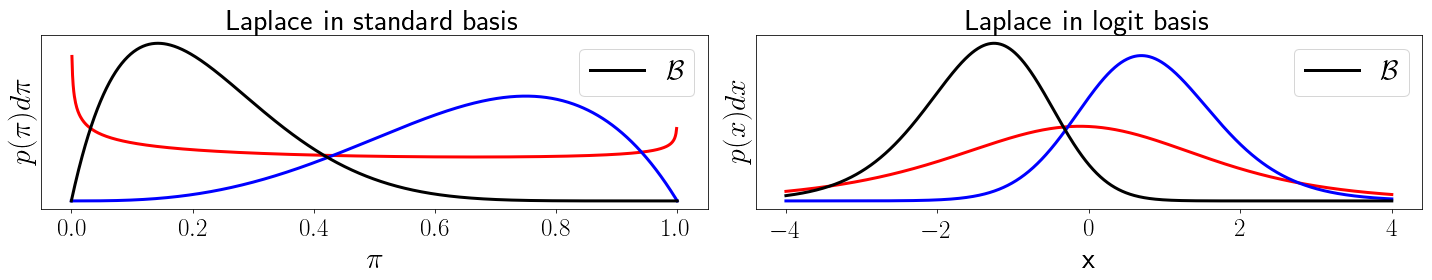

In [5]:
plot_beta_t_logit(params=[[0.8,0.9], [4,2,], [2, 7]], save=True, filename='beta_logit_bridge_wo_back.pdf', show_back=False)

In [39]:
#Dirichlet Bridge for the BNN paper
width_inches = 5.520624861111111

"""values"""

def plot_beta_t_logit2(params, save=False, filename='beta_logit_bridge.pdf', show_back=True):

    a1, b1 = params[0] #5,1
    a2, b2 = params[1] #4,2
    a3, b3 = params[2] #8,3

    x = np.linspace(0,1, 1000 +1)
    x_t = np.linspace(-4,4, 1000 +1)

    mode1 = beta_mu(a1, b1)
    mode2 = beta_mu(a2, b2)
    mode3 = beta_mu(a3, b3)

    #plot1: normal base
    sigma1 = np.sqrt(beta_var(a1, b1))
    sigma2 = np.sqrt(beta_var(a2, b2))
    sigma3 = np.sqrt(beta_var(a3, b3))

    y1 = beta_pdf(x, a1, b1)
    y2 = beta_pdf(x, a2, b2)
    y3 = beta_pdf(x, a3, b3)

    LP_approx1 = norm.pdf(x, mode1, sigma1)
    LP_approx2 = norm.pdf(x, mode2, sigma2)
    LP_approx3 = norm.pdf(x, mode3, sigma3)

    #plot 2: transform to other base
    y1_t_logit = beta_t_logit_pdf(x_t, a1, b1)
    y2_t_logit = beta_t_logit_pdf(x_t, a2, b2)
    y3_t_logit = beta_t_logit_pdf(x_t, a3, b3)

    mode1_t_logit = beta_t_logit_mu(a1,b1)
    mode2_t_logit = beta_t_logit_mu(a2,b2)
    mode3_t_logit = beta_t_logit_mu(a3,b3)

    sigma1_t_logit = np.sqrt(beta_t_logit_var(a1, b1))
    sigma2_t_logit = np.sqrt(beta_t_logit_var(a2, b2))
    sigma3_t_logit = np.sqrt(beta_t_logit_var(a3, b3))


    LP_approx1_t_logit = norm.pdf(x_t, mode1_t_logit, sigma1_t_logit)
    LP_approx2_t_logit = norm.pdf(x_t, mode2_t_logit, sigma2_t_logit)
    LP_approx3_t_logit = norm.pdf(x_t, mode3_t_logit, sigma3_t_logit)

    #plot 3: transform back and reconstruct
    if show_back:
        y1_back = logit_normal_back(x, mode1_t_logit, sigma1_t_logit)
        y2_back = logit_normal_back(x, mode2_t_logit, sigma2_t_logit)
        y3_back = logit_normal_back(x, mode3_t_logit, sigma3_t_logit)

    """Plots"""
    #plt.rcParams['xtick.labelsize'] = 20
    #plt.rcParams['ytick.labelsize'] = 20
    #plt.rcParams["font.family"] = "serif"
    #plt.rcParams["font.serif"] = "Times New Roman"
    
    legend_size=30
    xlabel_size=35
    ylabel_size=35
    title_size=32
    lw_size=3
    
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    plt.rc('axes', labelsize=25)
    #plt.rcParams["font.weight"] = "bold"
    #plt.rcParams["axes.labelweight"] = "bold"
    
    if show_back:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
    else:
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 4))
        
    #fig.set_size_inches(width_inches, 0.33 * width_inches)
    
    #plot beta distribution and LPA in the standard basis
    axs[0].plot(x, y1, 'r-', lw=lw_size)
    axs[0].plot(x, y2, 'b-', lw=lw_size)
    axs[0].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{D}$')
    axs[0].plot(x, LP_approx1, 'r--', lw=lw_size)
    axs[0].plot(x, LP_approx2, 'b--', lw=lw_size)
    axs[0].plot(x, LP_approx3, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[0].set_yticklabels([])
    axs[0].set_yticks([])
    axs[0].set_xlabel('$\pi$', fontsize=xlabel_size)
    axs[0].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
    axs[0].set_title('Laplace in standard basis', fontsize=title_size)
    axs[0].legend(prop={'size': legend_size});

    #plot beta distribution in the transformed basis
    axs[1].plot(x_t, y1_t_logit, 'r-', lw=lw_size)
    axs[1].plot(x_t, y2_t_logit, 'b-', lw=lw_size)
    axs[1].plot(x_t, y3_t_logit, 'k-', lw=lw_size, label='$\mathcal{D}$')
    axs[1].plot(x_t, LP_approx1_t_logit, 'r--', lw=lw_size)
    axs[1].plot(x_t, LP_approx2_t_logit, 'b--', lw=lw_size)
    axs[1].plot(x_t, LP_approx3_t_logit, 'k--', lw=lw_size, label='$\mathcal{N}$')
    axs[1].set_xlabel('x', fontsize=xlabel_size)
    axs[1].set_ylabel('$p(x)dx$', fontsize=ylabel_size)
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_title('Laplace in logit basis', fontsize=title_size)
    axs[1].legend(prop={'size': legend_size});

    #plot backwards transformation of the LPA from the transformed to the standard basis
    if show_back:
        axs[2].plot(x, y1, 'r-', lw=lw_size)
        axs[2].plot(x, y2, 'b-', lw=lw_size)
        axs[2].plot(x, y3, 'k-', lw=lw_size, label='$\mathcal{D}$')
        axs[2].plot(x, y1_back, 'r--', lw=lw_size)
        axs[2].plot(x, y2_back, 'b--', lw=lw_size)
        axs[2].plot(x, y3_back, 'k--', lw=lw_size, label='$\mathcal{N}$')
        axs[2].set_yticklabels([])
        axs[2].set_yticks([])
        axs[2].set_xlabel('$\pi$', fontsize=xlabel_size)
        axs[2].set_ylabel('$p(\pi)d\pi$', fontsize=ylabel_size)
        axs[2].set_title('Transformation back to standard basis', fontsize=title_size)
        axs[2].legend(prop={'size': legend_size});

    plt.tight_layout()
    
    if save:
        #tpl.clean_figure(fig) #not working for some reason
        #tpl.save(filename, figure=fig, axis_width='\\figwidth', 
        #         axis_height='\\figheight', extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 
        #        'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})

        plt.savefig(filename)

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide

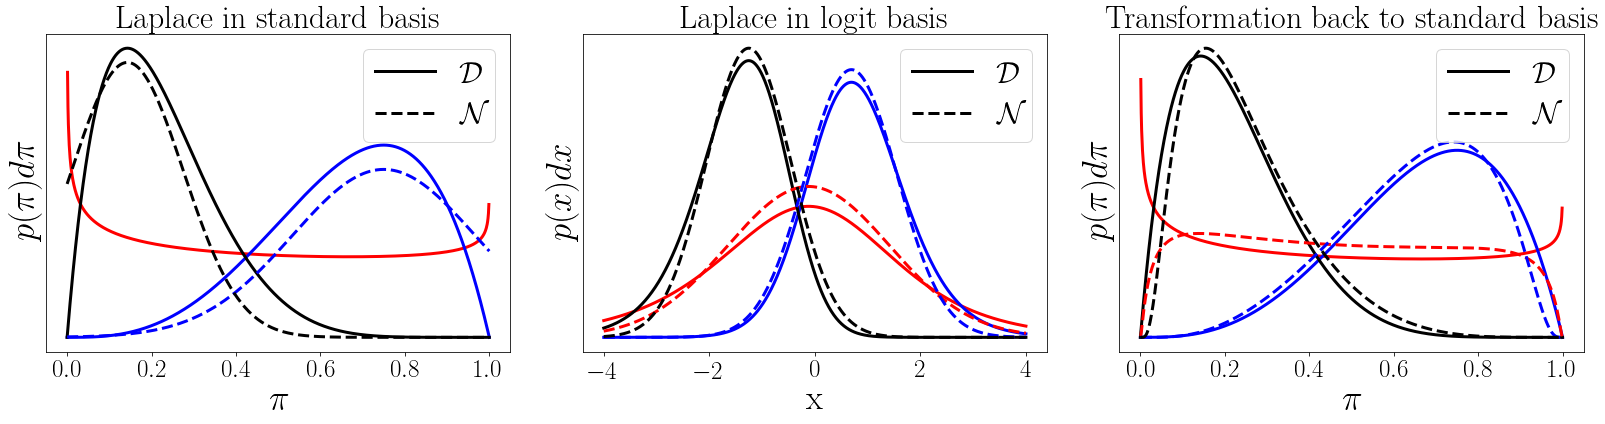

In [40]:
plot_beta_t_logit2(params=[[0.8,0.9], [4,2,], [2, 7]], save=True, filename='Dirichlet_LB_for_BNNs.pdf', show_back=True)

# Verify the Bridge

In [6]:
def alpha_beta_from_normal(mu, sigma):
    a = (np.exp(mu) + 1)/sigma**2
    b = (np.exp(-mu) + 1)/sigma**2

    return(a, b)

test_a1, test_b1 = 3,4
test_m1, test_s1 = beta_t_logit_mu(test_a1, test_b1), np.sqrt(beta_t_logit_var(test_a1, test_b1))
test_a2, test_b2 = alpha_beta_from_normal(test_m1, test_s1)

print(test_a2, test_b2)

rand_a1, rand_b1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = beta_t_logit_mu(rand_a1, rand_b1), np.sqrt(beta_t_logit_var(rand_a1, rand_b1))
rand_a2, rand_b2 = alpha_beta_from_normal(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_b1, rand_b2))

3.0 3.999999999999999


# Statistical distance measures

In [7]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, beta
import torch

## MMD from 100 combinations of parameters

In [8]:
def MMD_combinations(params, plot=False, n_samples=1000, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    MMD_sum = 0
    MMD_t_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            if a+b == 2:
                break
            
            #get samples from all dists
            #standard
            B_samples = beta.rvs(a, b, size=n_samples)
            if a >= 1:                
                mode1 = beta_mu(a, b)
                sigma1 = np.sqrt(beta_var(a, b))
                N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            #logit
            mode1_logit = beta_t_logit_mu(a, b)
            sigma1_logit = np.sqrt(beta_t_logit_var(a, b))
            B_samples_logit = logit_transform(B_samples)
            N_samples_logit = norm.rvs(mode1_logit, sigma1_logit, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            B_samples_ = torch.Tensor(B_samples.reshape((n_samples, -1)))
            if a >= 1:
                N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
                MMD_ = MMD(B_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
                MMD_ = torch.max(torch.zeros(1), MMD_)
            else:
                MMD_ = torch.Tensor([np.nan])
                
            #logit
            B_samples_logit_ = torch.Tensor(B_samples_logit.reshape((n_samples, -1)))
            N_samples_logit_ = torch.Tensor(N_samples_logit.reshape((n_samples, -1)))
            MMD_logit_= MMD(B_samples_logit_, N_samples_logit_,  alphas=[0.5], ret_matrix=False)
            MMD_logit_= torch.max(torch.zeros(1), MMD_logit_)
            

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(23, 6))
                axs[0].hist(B_samples, bins = n_bins, alpha=0.5, label='$\mathcal{B}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(B_samples_logit, bins = n_bins, alpha=0.5, label='$\mathcal{B}$')
                axs[1].hist(N_samples_logit, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('logit basis')
                axs[1].legend()
                
                plt.show()
                
            if verbose: 
                print("standard: ", MMD_.item(), "logit: ", MMD_logit_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_logit_sum += MMD_logit_
            
    return(MMD_sum.item(), MMD_t_logit_sum.item())

a:  1.1 b:  1.1


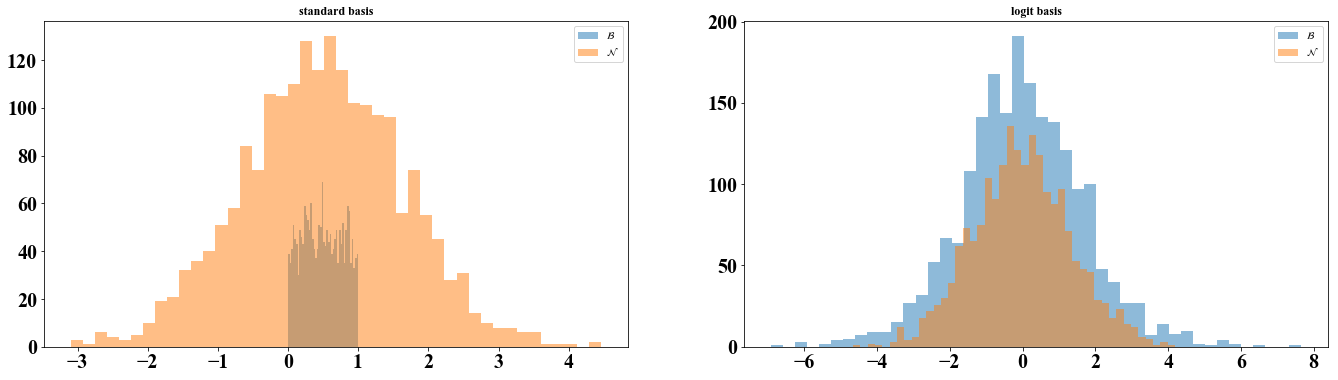

standard:  0.15468662977218628 logit:  0.00568002462387085
a:  1.1 b:  1.6


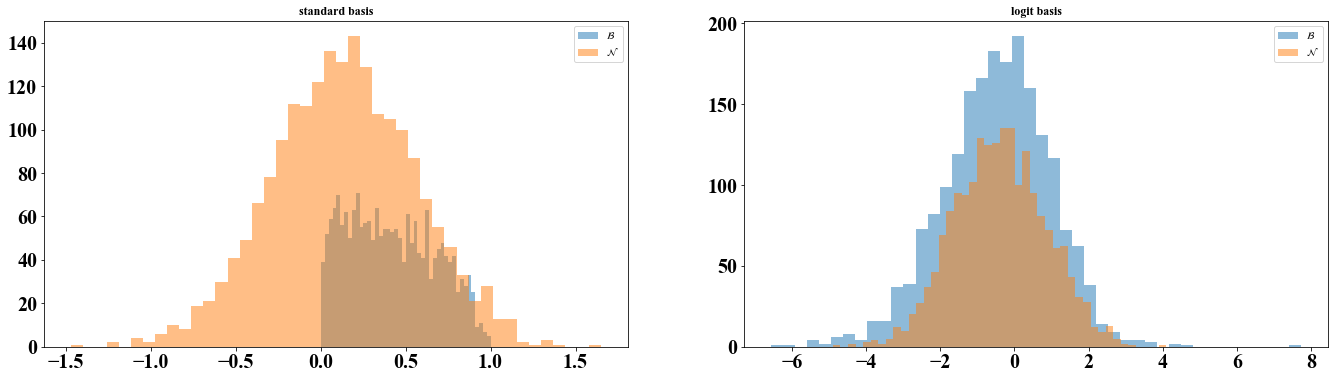

standard:  0.060830891132354736 logit:  0.003402411937713623
a:  1.1 b:  2.1


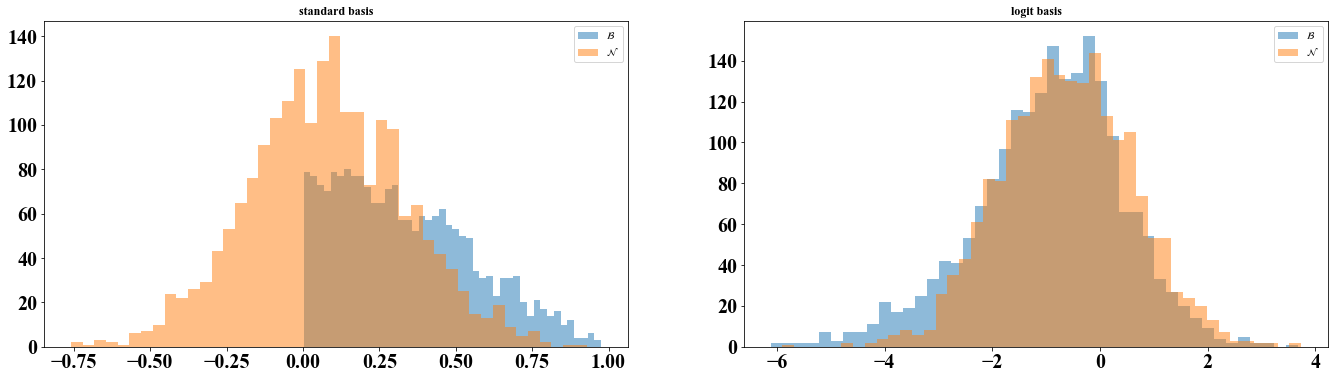

standard:  0.054247140884399414 logit:  0.0058221518993377686
a:  1.1 b:  2.6


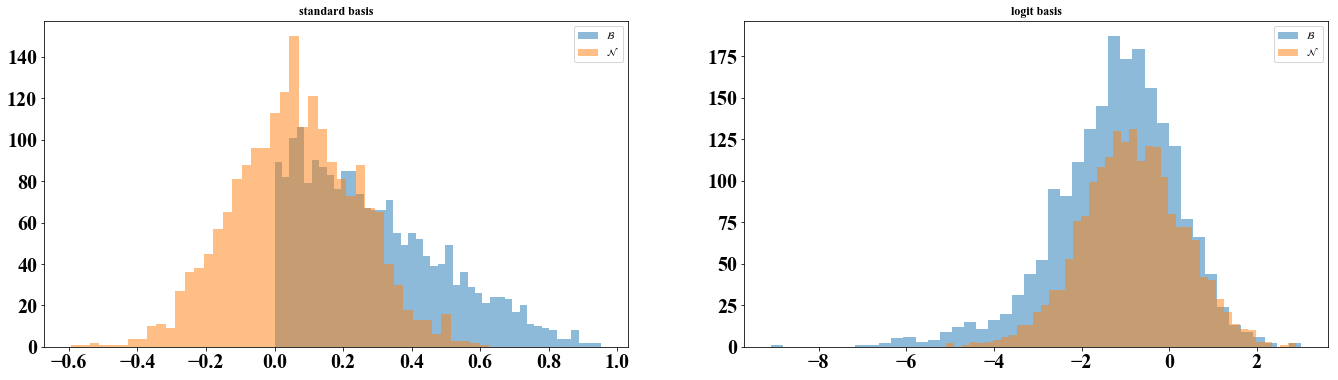

standard:  0.044780194759368896 logit:  0.009536325931549072
a:  1.1 b:  3.1


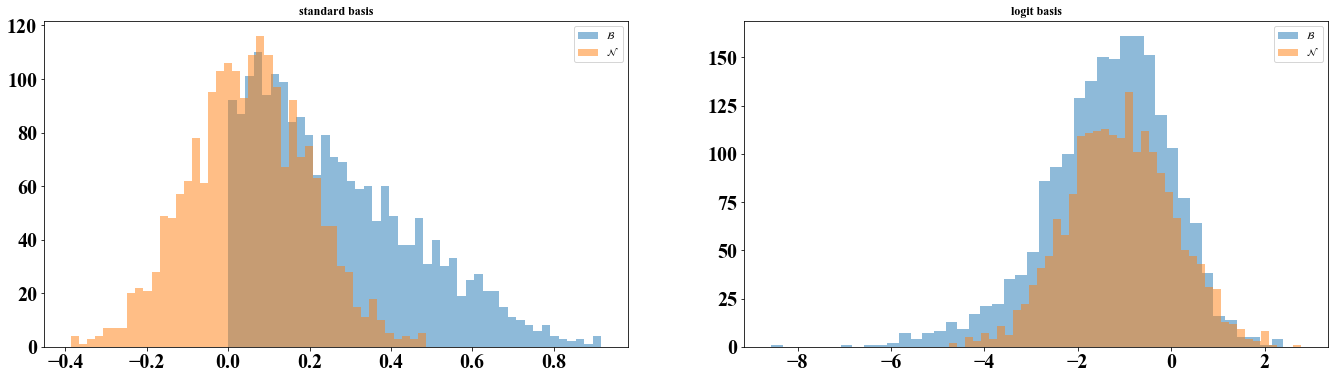

standard:  0.04134976863861084 logit:  0.00414729118347168
a:  1.1 b:  3.6


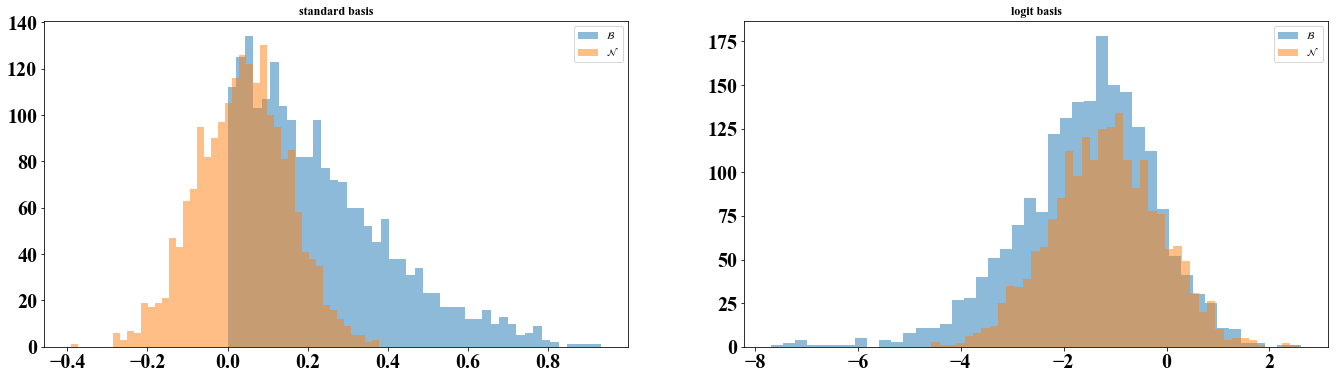

standard:  0.03441363573074341 logit:  0.013113558292388916
a:  1.1 b:  4.1


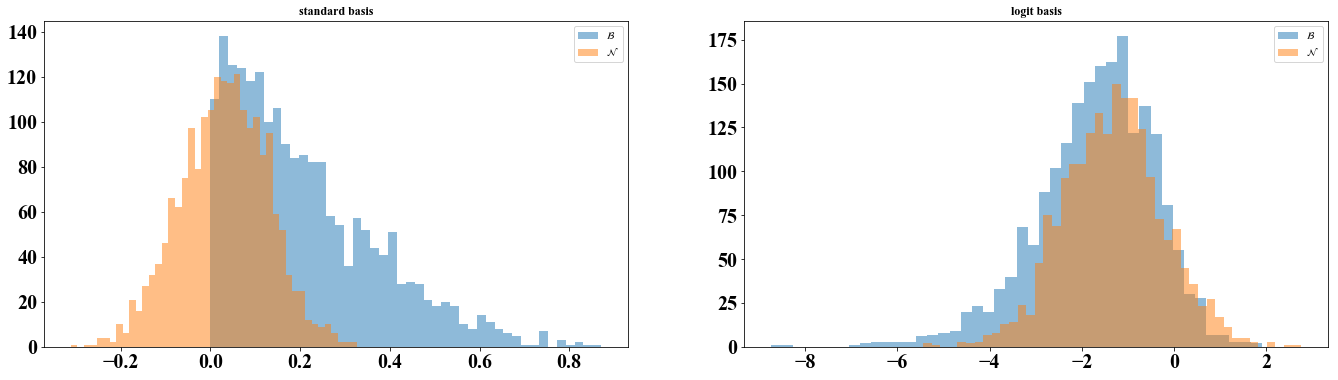

standard:  0.029868364334106445 logit:  0.010705173015594482
a:  1.1 b:  4.6


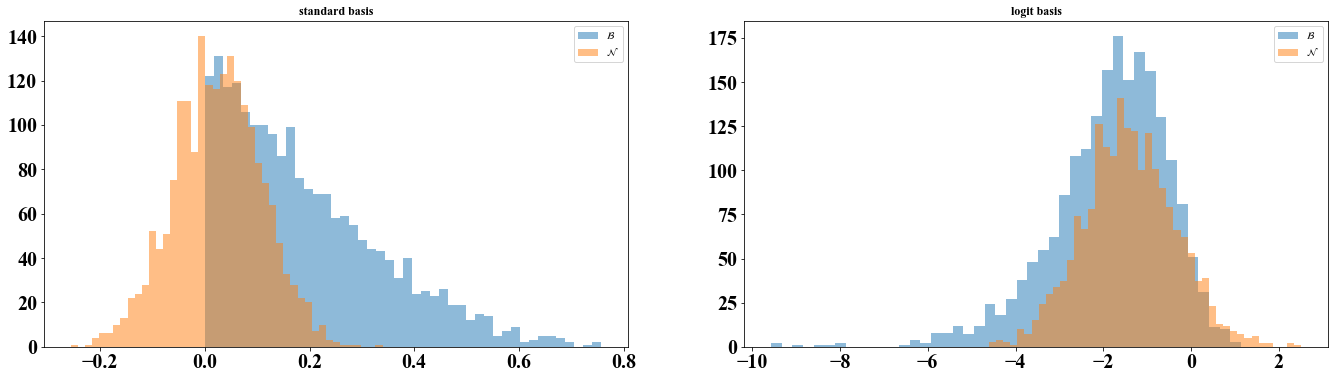

standard:  0.02641904354095459 logit:  0.013565778732299805
a:  1.6 b:  1.1


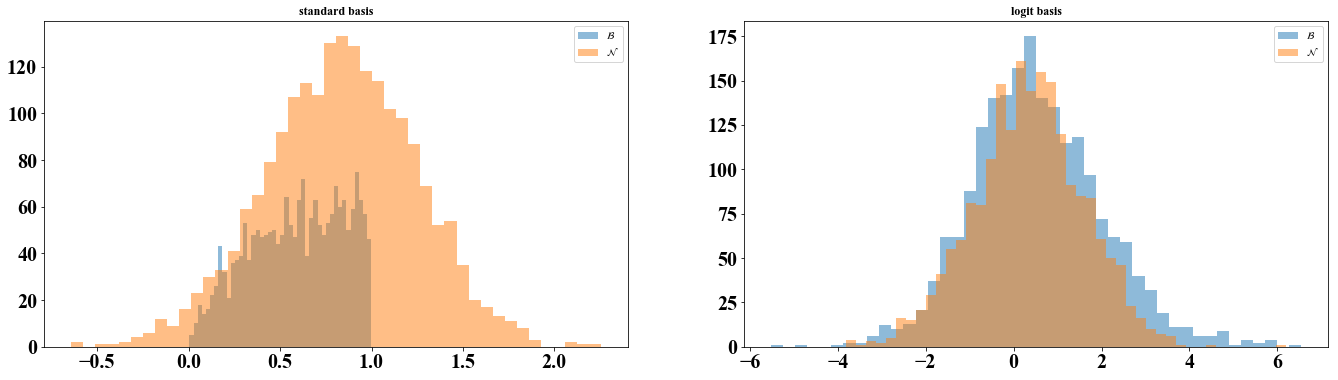

standard:  0.04773133993148804 logit:  0.004564940929412842
a:  1.6 b:  1.6


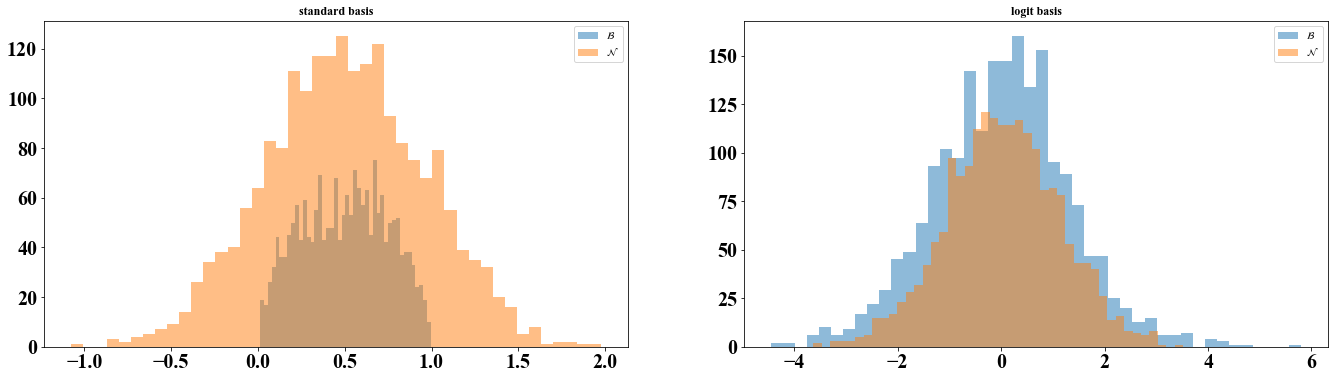

standard:  0.008993387222290039 logit:  0.00429147481918335
a:  1.6 b:  2.1


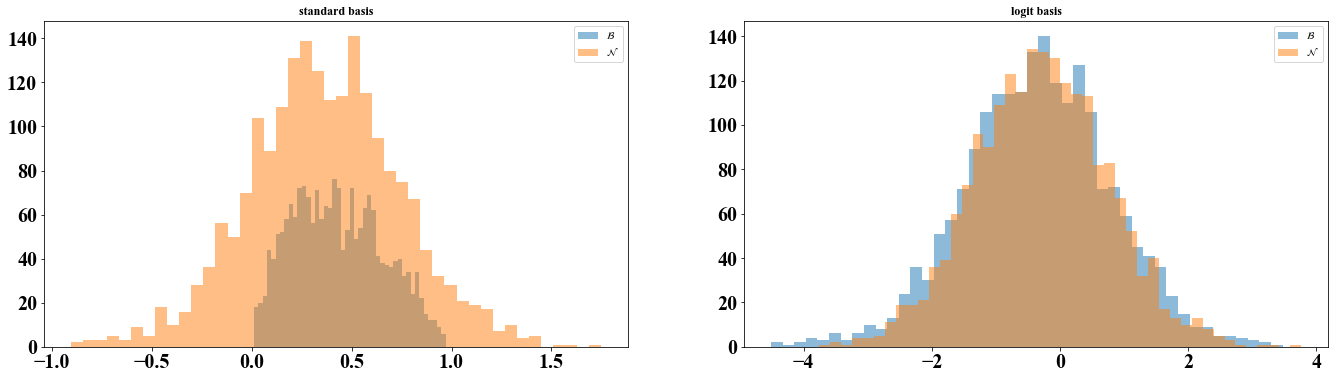

standard:  0.007509768009185791 logit:  0.001154184341430664
a:  1.6 b:  2.6


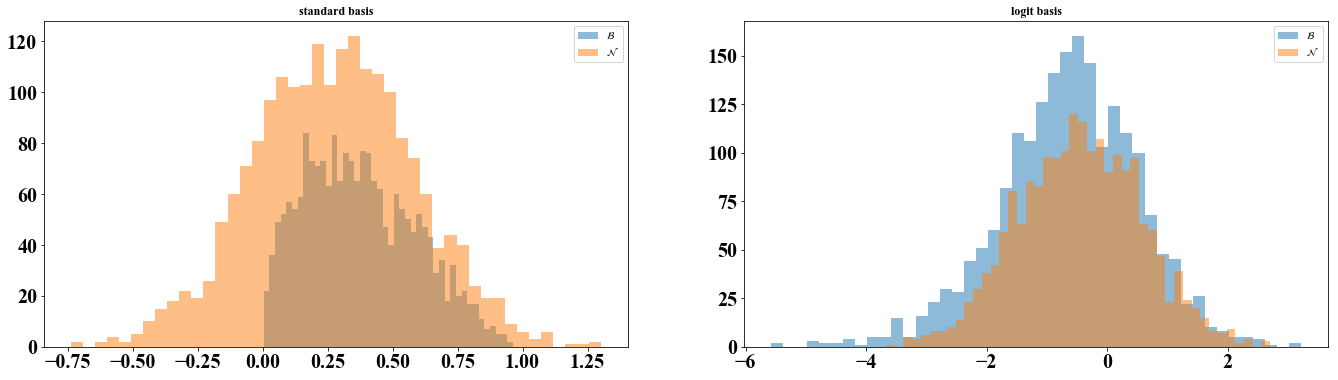

standard:  0.00990217924118042 logit:  0.0037833452224731445
a:  1.6 b:  3.1


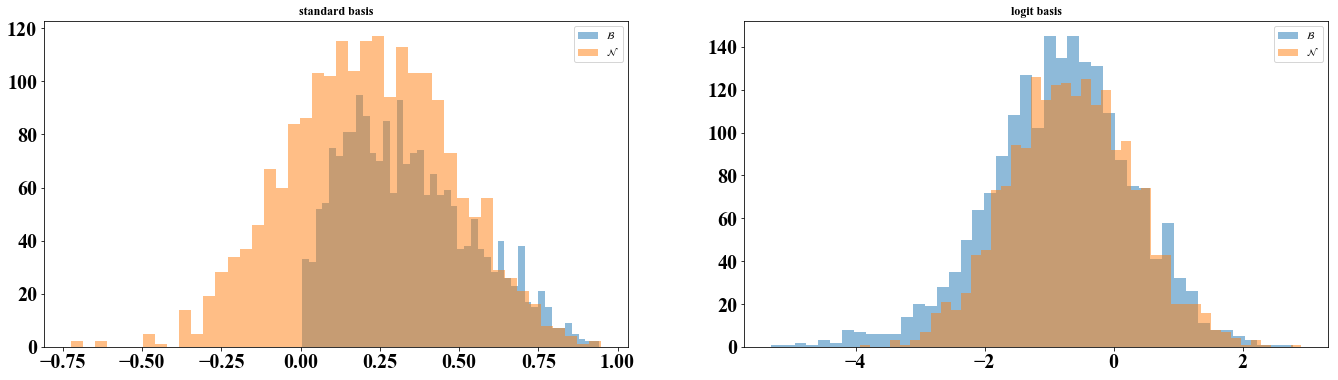

standard:  0.013458251953125 logit:  0.004538893699645996
a:  1.6 b:  3.6


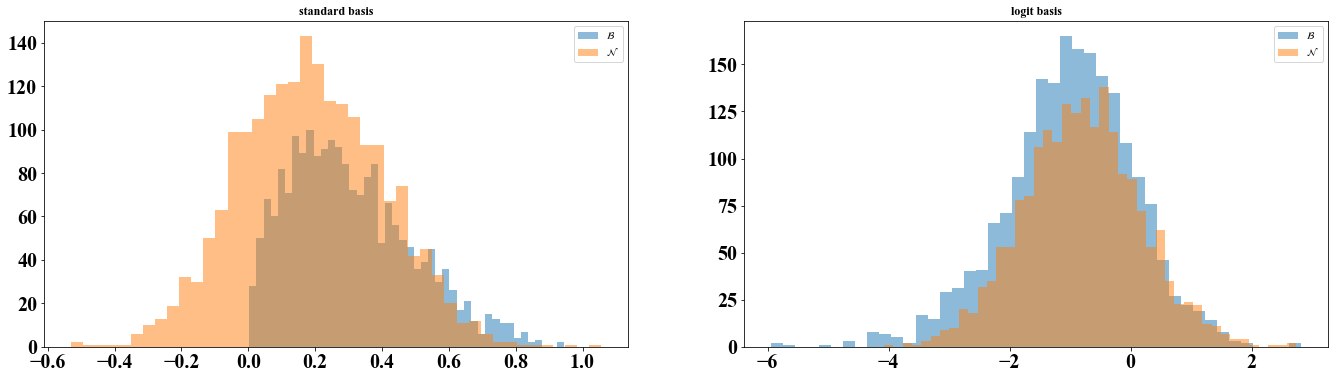

standard:  0.012452542781829834 logit:  0.004021704196929932
a:  1.6 b:  4.1


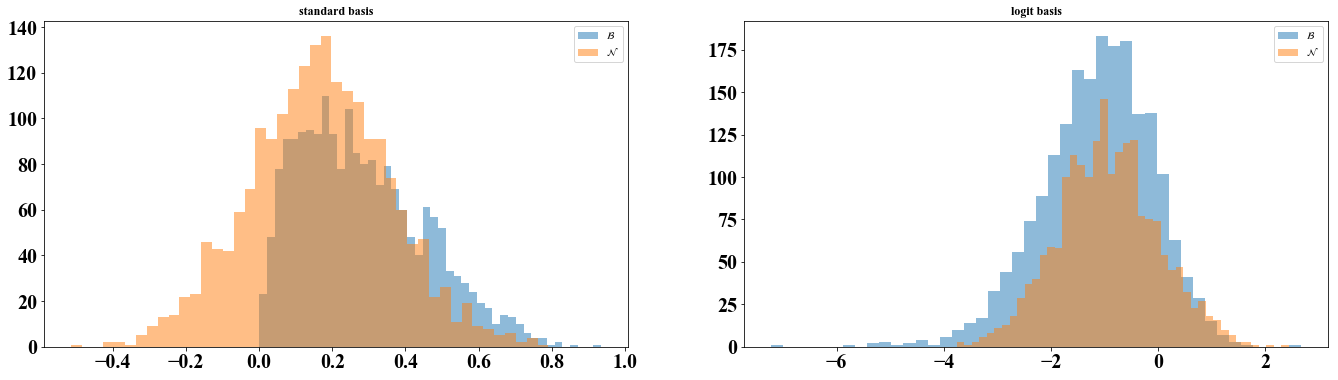

standard:  0.012146532535552979 logit:  0.00400930643081665
a:  1.6 b:  4.6


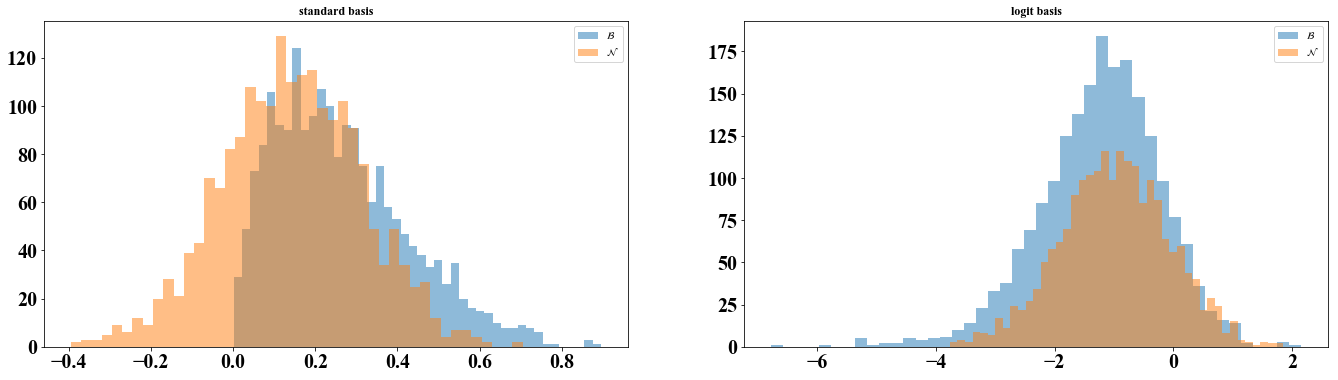

standard:  0.013398051261901855 logit:  0.0075817108154296875
a:  2.1 b:  1.1


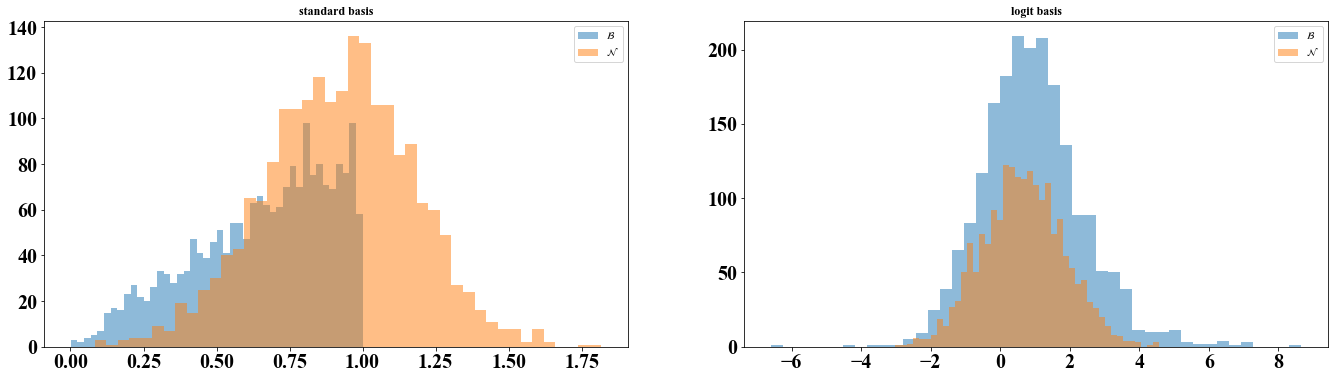

standard:  0.05430459976196289 logit:  0.006605863571166992
a:  2.1 b:  1.6


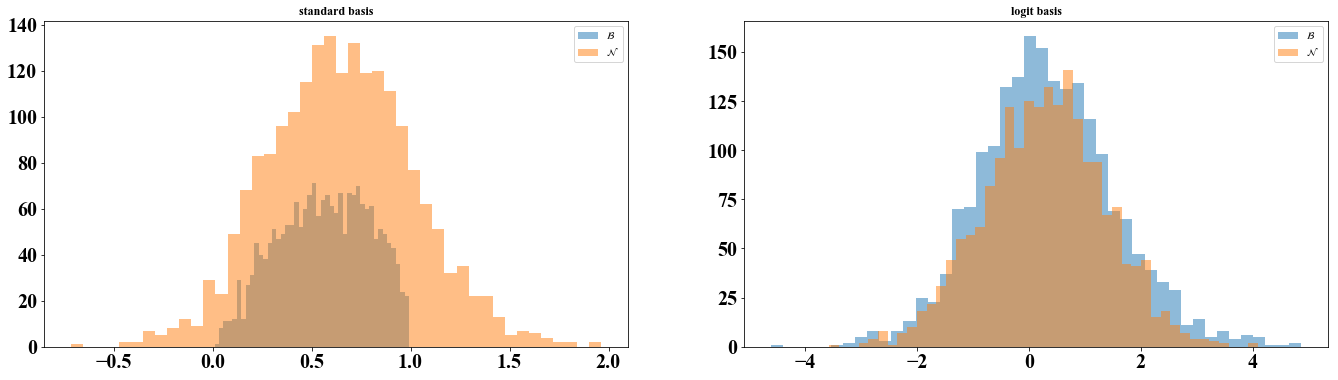

standard:  0.008533656597137451 logit:  0.0013416409492492676
a:  2.1 b:  2.1


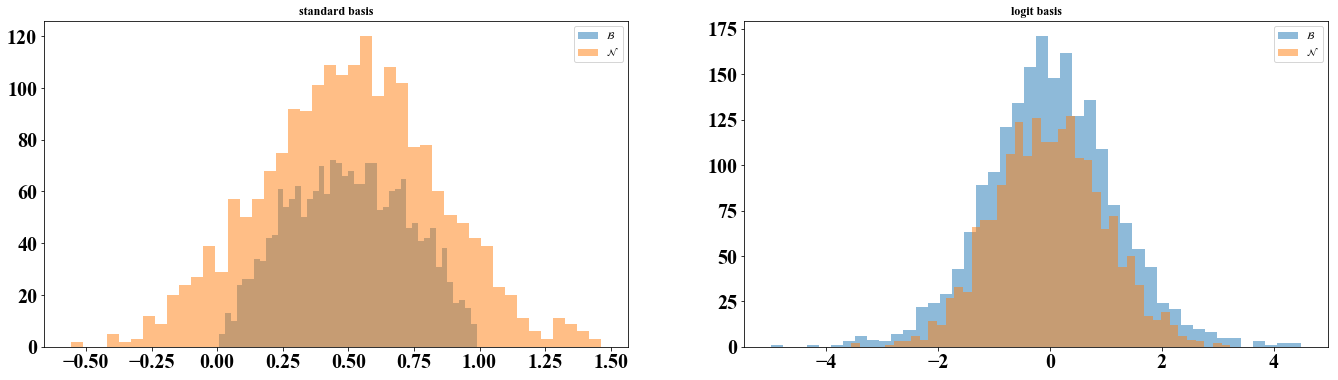

standard:  0.0017824769020080566 logit:  0.002292811870574951
a:  2.1 b:  2.6


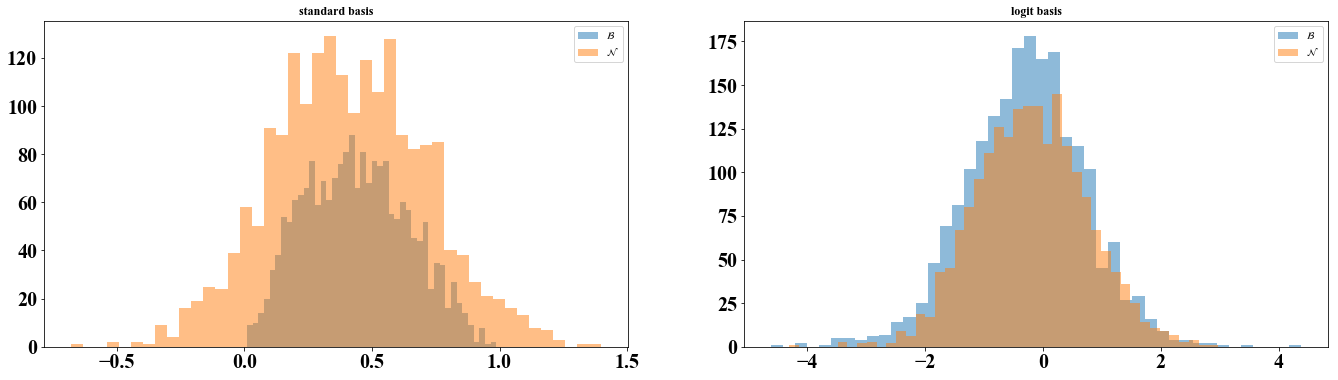

standard:  0.0021095871925354004 logit:  0.0011104345321655273
a:  2.1 b:  3.1


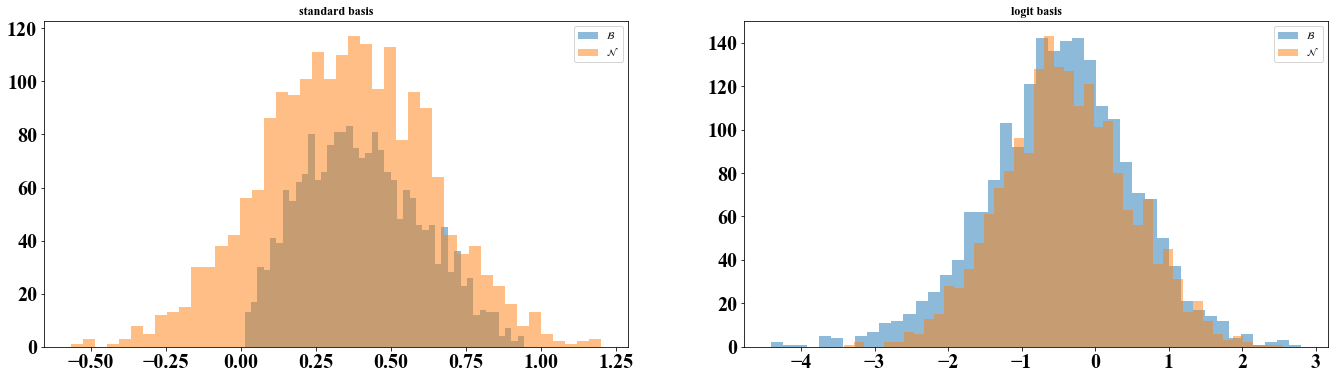

standard:  0.0032726526260375977 logit:  0.0023366212844848633
a:  2.1 b:  3.6


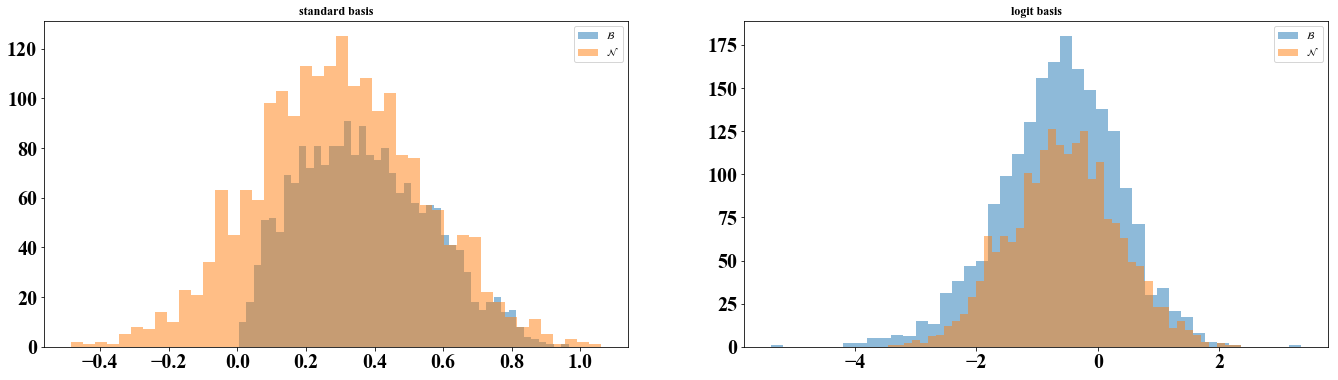

standard:  0.0054773688316345215 logit:  0.0009341239929199219
a:  2.1 b:  4.1


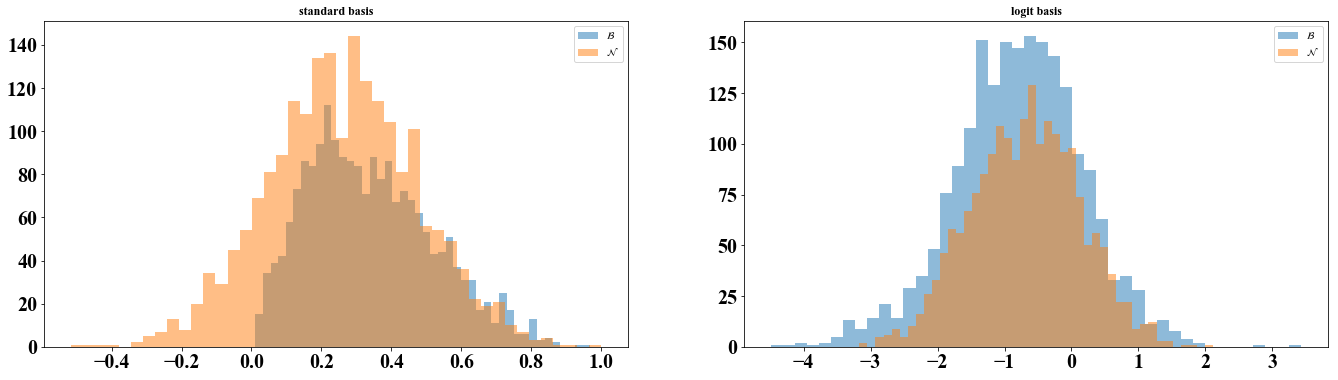

standard:  0.005805909633636475 logit:  0.0035280585289001465
a:  2.1 b:  4.6


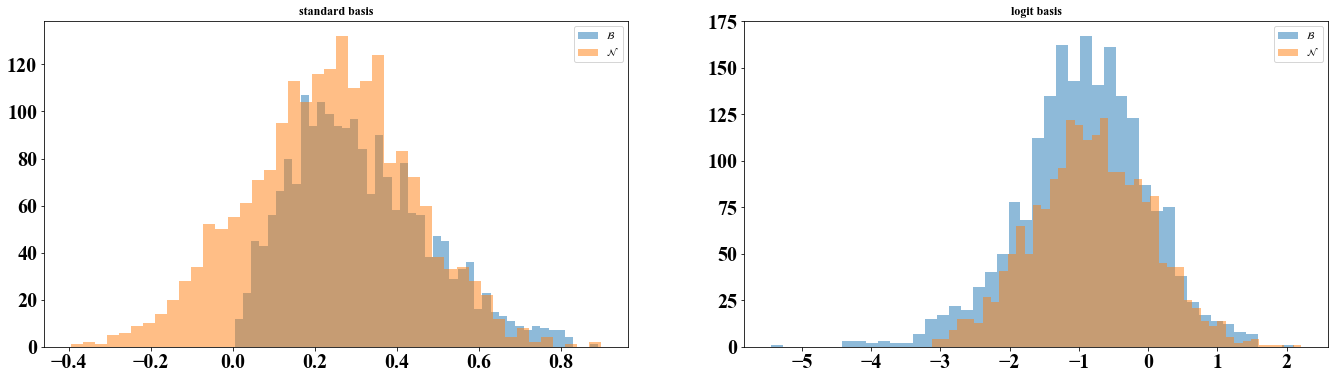

standard:  0.005305647850036621 logit:  0.0014984607696533203
a:  2.6 b:  1.1


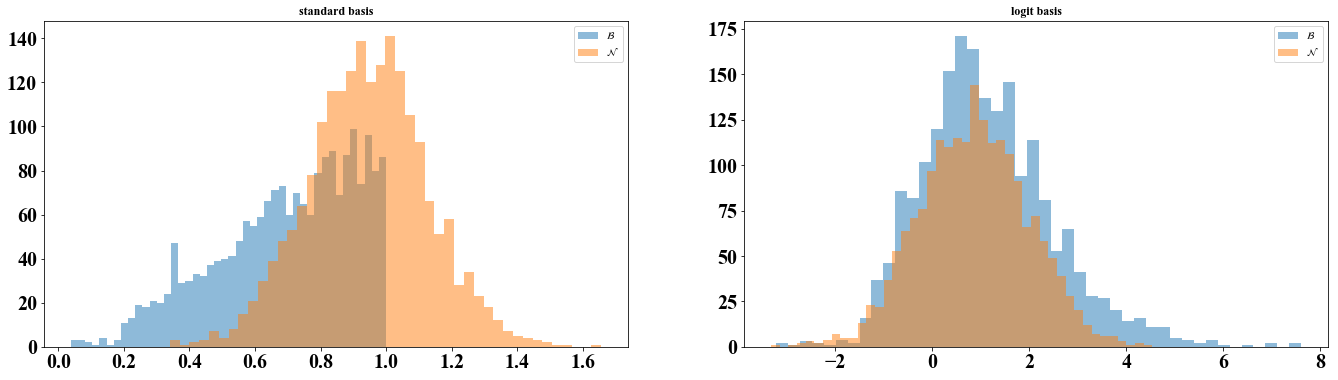

standard:  0.05325561761856079 logit:  0.00597381591796875
a:  2.6 b:  1.6


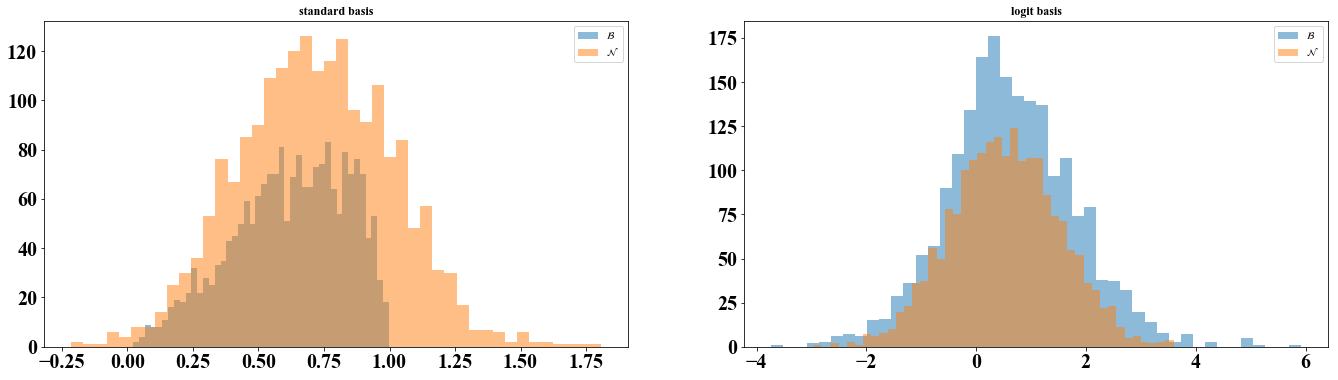

standard:  0.008174598217010498 logit:  0.003375828266143799
a:  2.6 b:  2.1


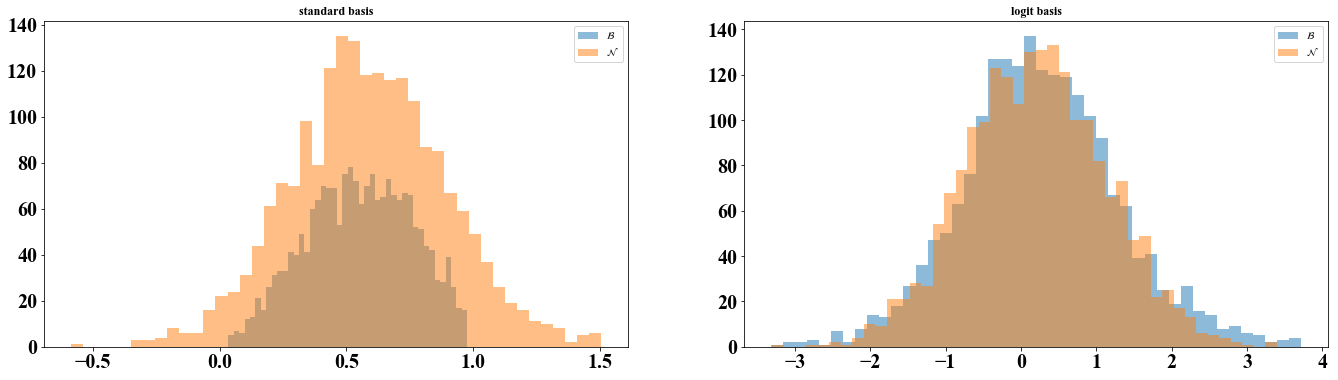

standard:  0.002163827419281006 logit:  0.0008363127708435059
a:  2.6 b:  2.6


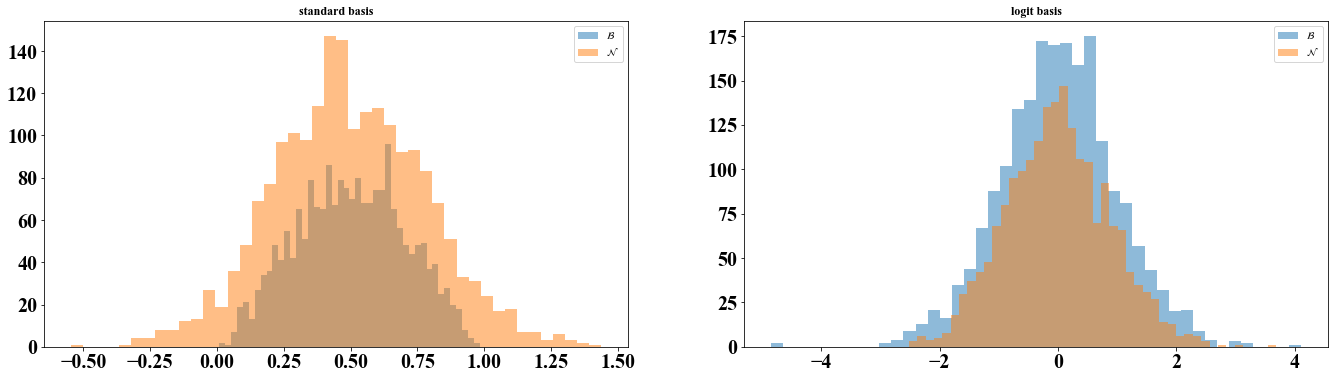

standard:  0.0008686184883117676 logit:  0.0012602806091308594
a:  2.6 b:  3.1


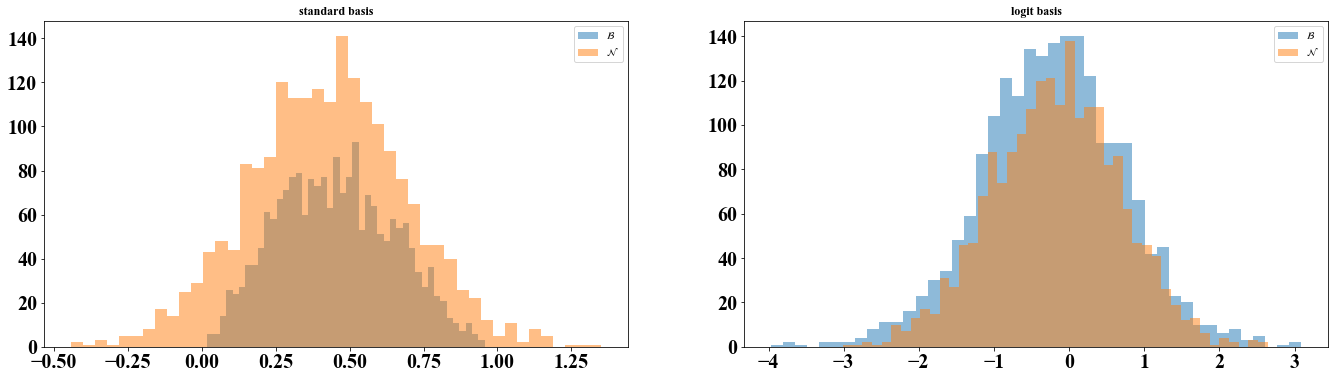

standard:  0.0011451244354248047 logit:  0.001339554786682129
a:  2.6 b:  3.6


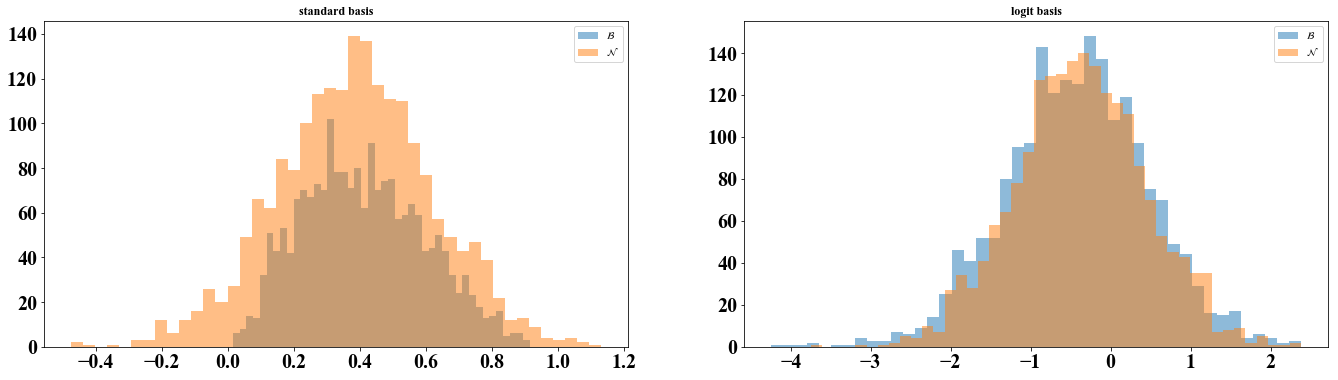

standard:  0.0008302927017211914 logit:  0.0009644627571105957
a:  2.6 b:  4.1


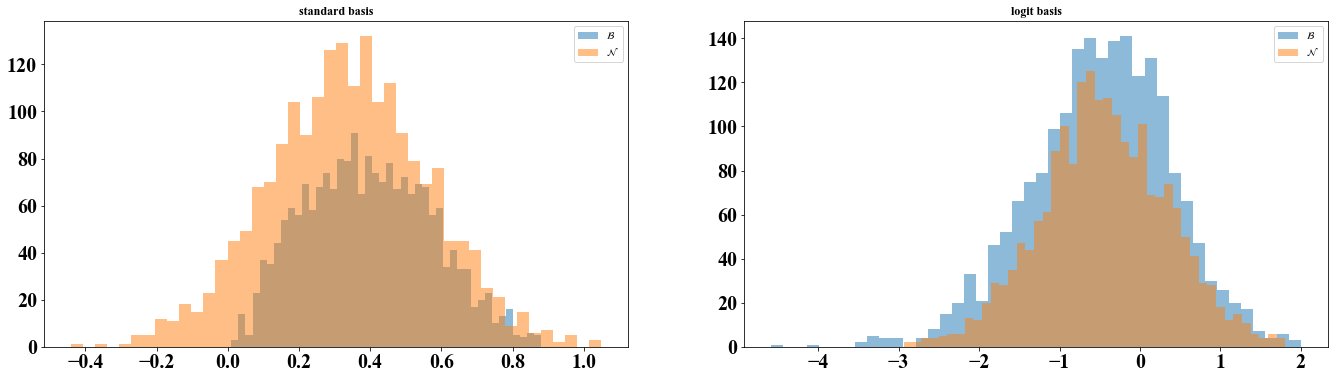

standard:  0.003188192844390869 logit:  0.0012938976287841797
a:  2.6 b:  4.6


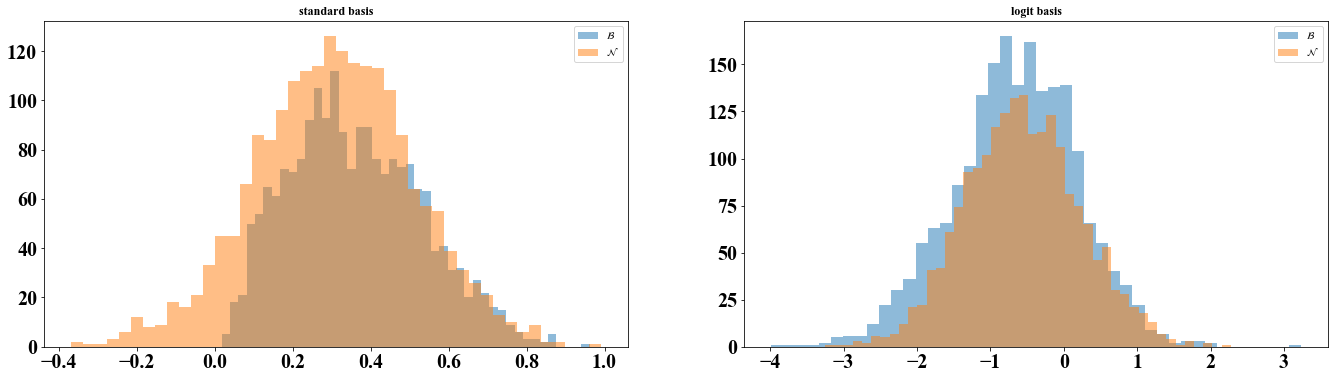

standard:  0.0026491284370422363 logit:  0.0020119547843933105
a:  3.1 b:  1.1


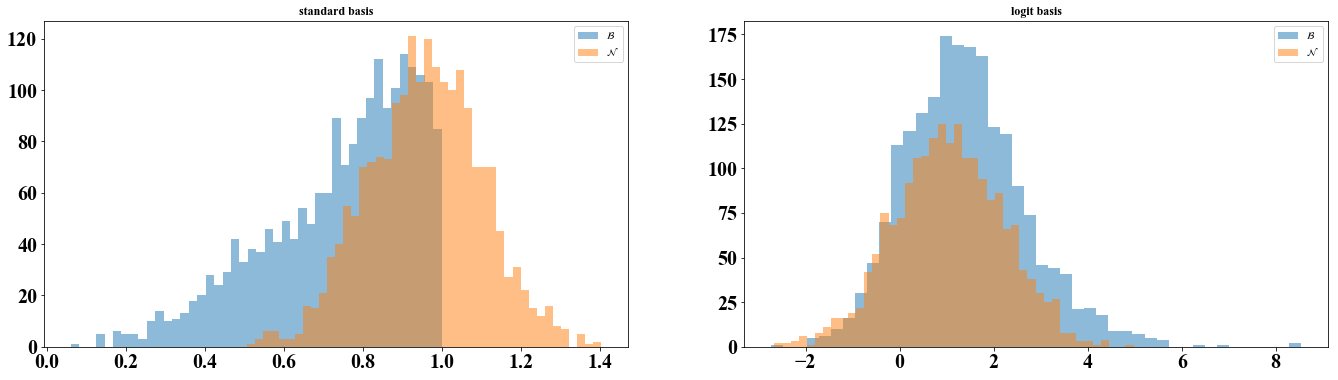

standard:  0.04074907302856445 logit:  0.008275628089904785
a:  3.1 b:  1.6


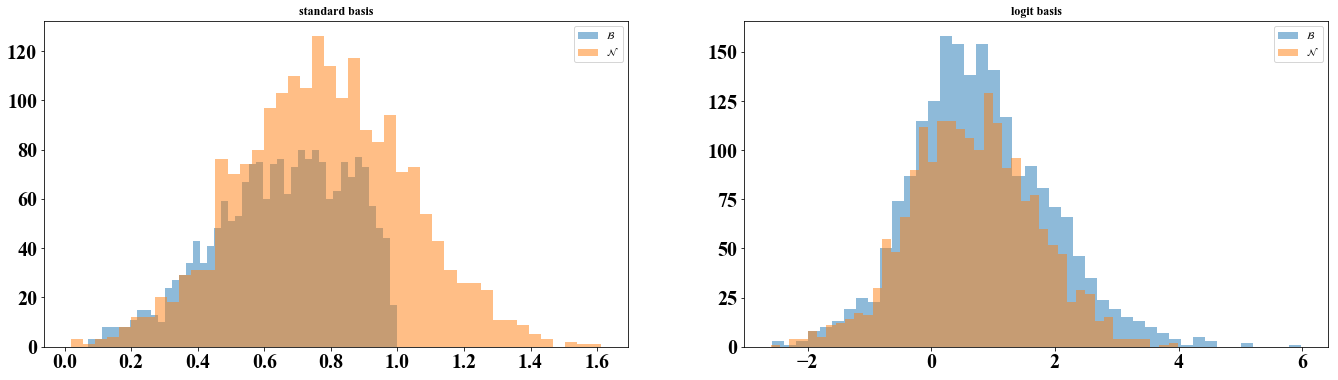

standard:  0.013665616512298584 logit:  0.001577913761138916
a:  3.1 b:  2.1


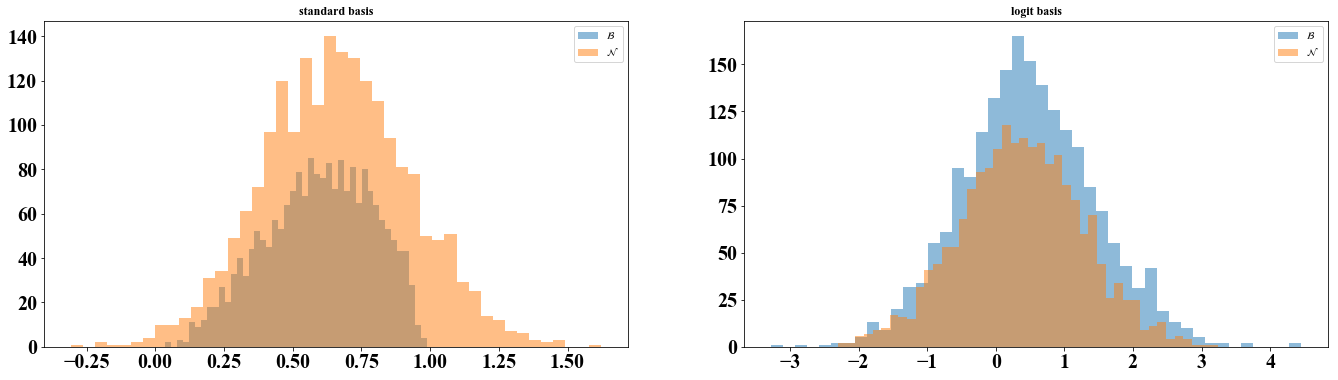

standard:  0.003814399242401123 logit:  0.0017982125282287598
a:  3.1 b:  2.6


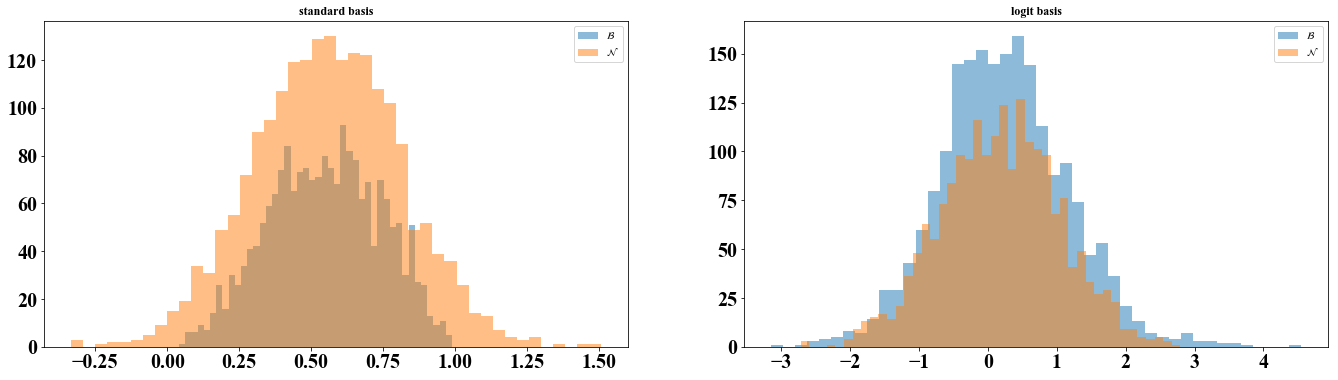

standard:  0.0004419684410095215 logit:  0.00029593706130981445
a:  3.1 b:  3.1


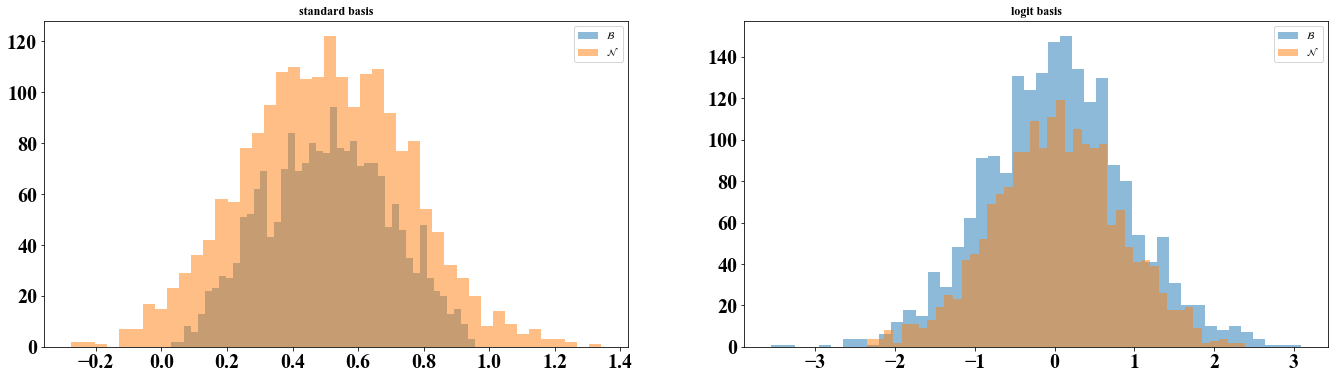

standard:  0.0003955960273742676 logit:  0.0009583234786987305
a:  3.1 b:  3.6


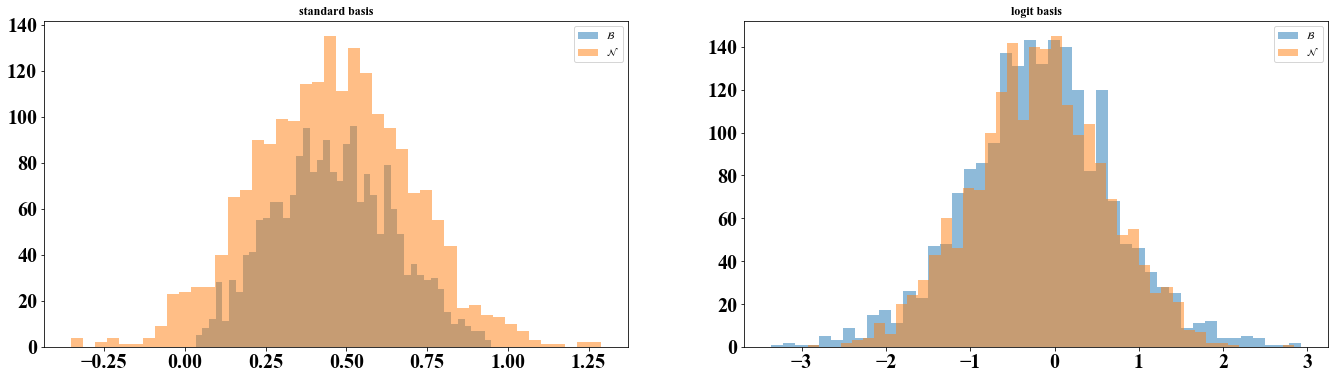

standard:  0.00028443336486816406 logit:  0.00037157535552978516
a:  3.1 b:  4.1


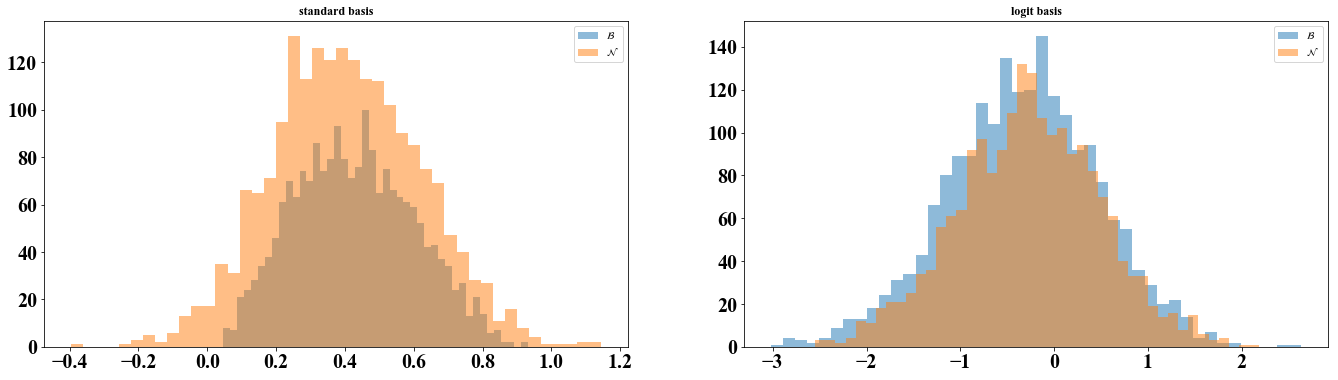

standard:  0.0006690025329589844 logit:  0.0012679100036621094
a:  3.1 b:  4.6


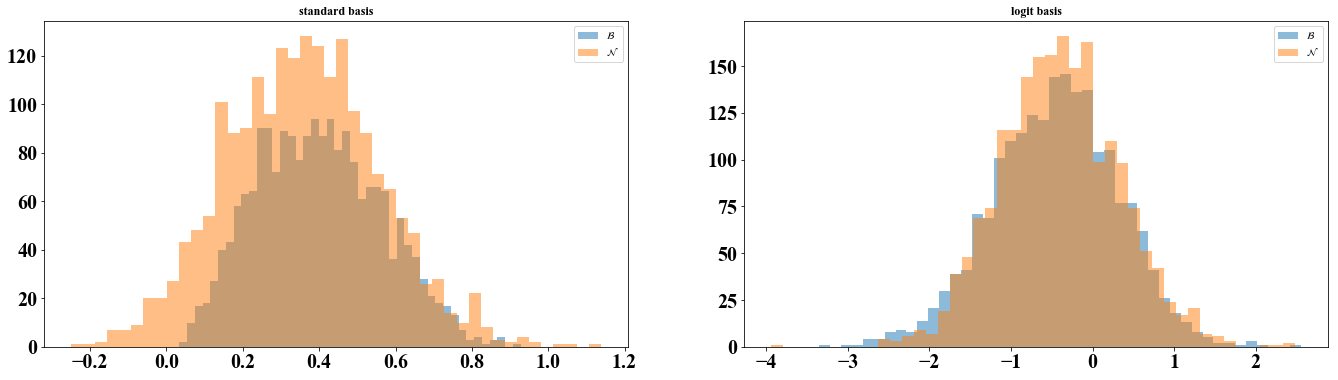

standard:  0.001688539981842041 logit:  0.0006233453750610352
a:  3.6 b:  1.1


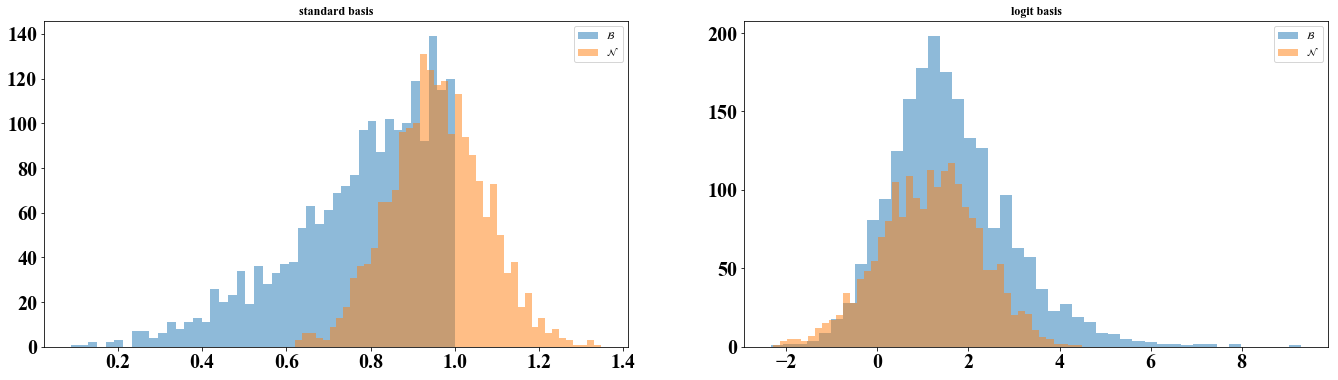

standard:  0.03174996376037598 logit:  0.012336254119873047
a:  3.6 b:  1.6


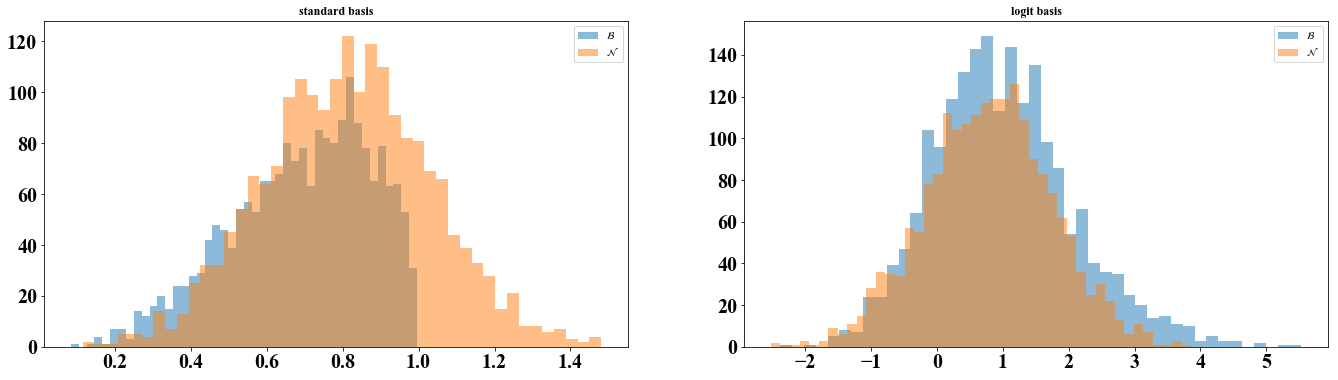

standard:  0.012583613395690918 logit:  0.004212796688079834
a:  3.6 b:  2.1


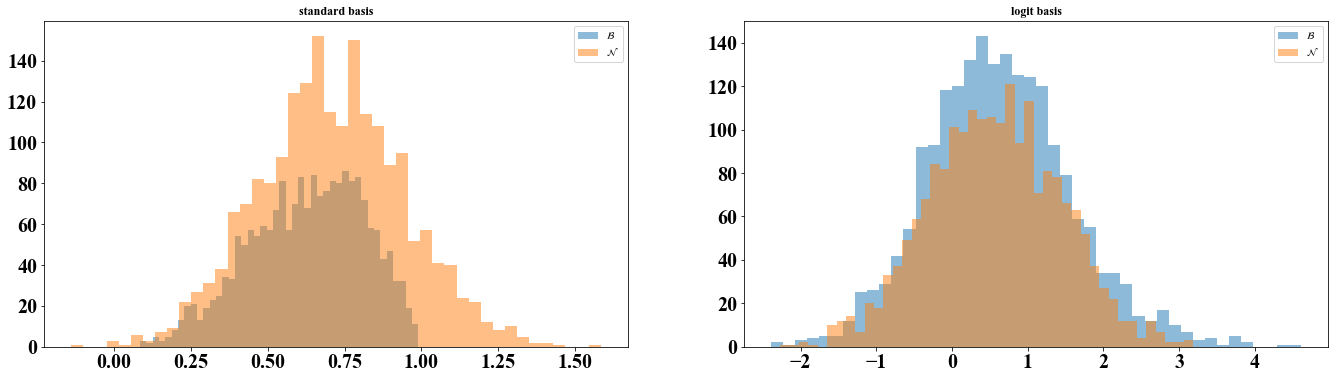

standard:  0.005544126033782959 logit:  0.0004283785820007324
a:  3.6 b:  2.6


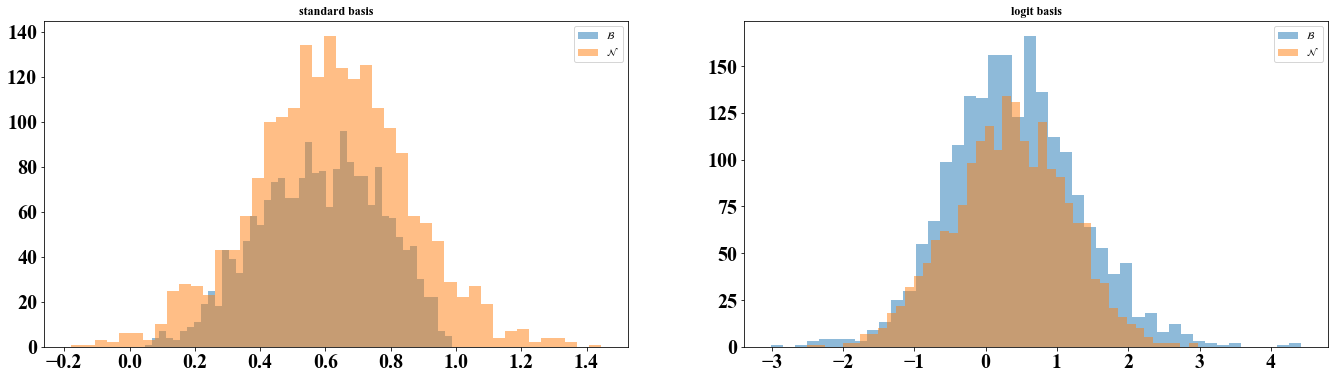

standard:  0.001094520092010498 logit:  0.0013779997825622559
a:  3.6 b:  3.1


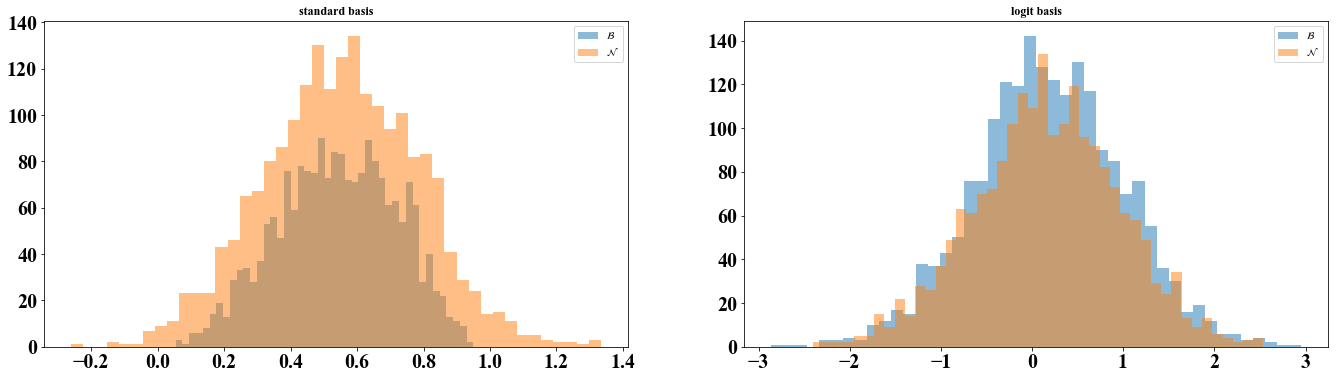

standard:  0.000362396240234375 logit:  0.0
a:  3.6 b:  3.6


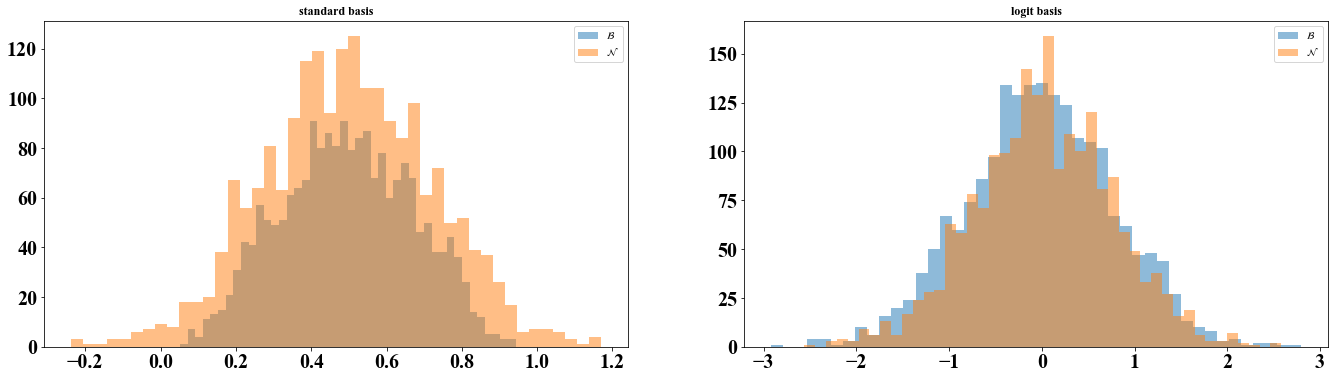

standard:  0.0001811385154724121 logit:  0.000766456127166748
a:  3.6 b:  4.1


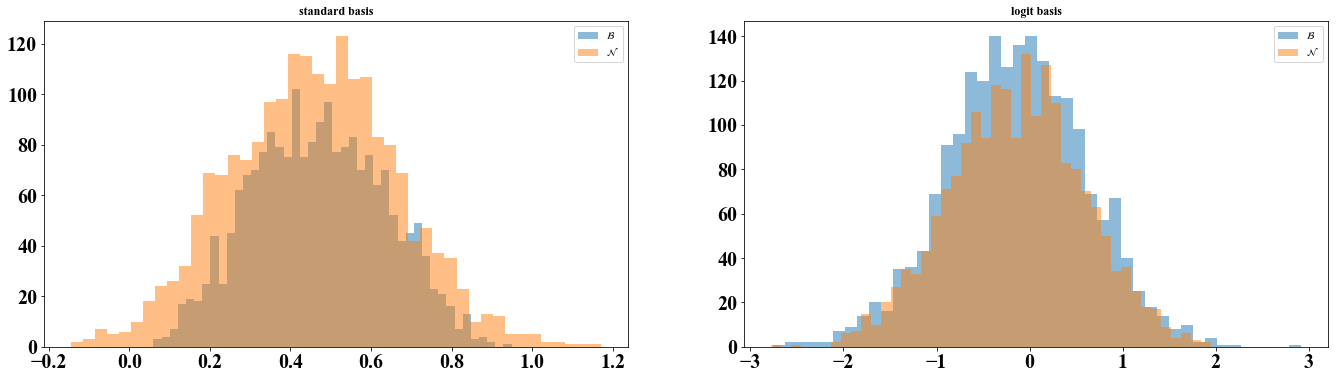

standard:  0.00027245283126831055 logit:  0.0
a:  3.6 b:  4.6


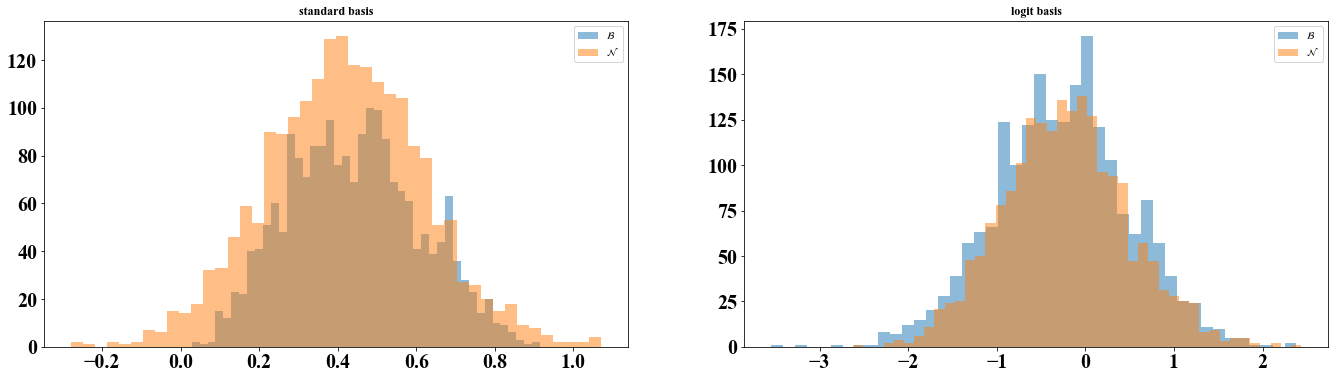

standard:  0.0005869865417480469 logit:  0.0007376670837402344
a:  4.1 b:  1.1


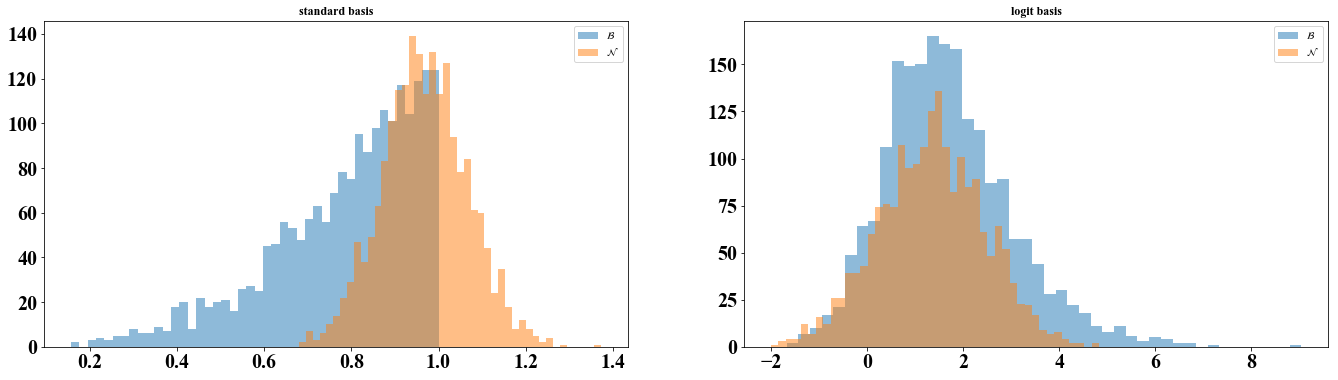

standard:  0.03170377016067505 logit:  0.008003830909729004
a:  4.1 b:  1.6


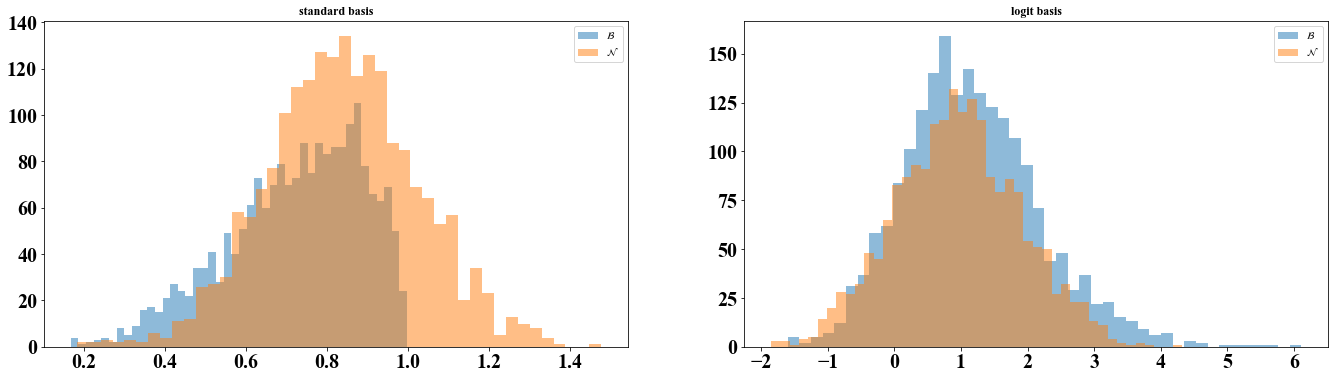

standard:  0.011956274509429932 logit:  0.004255056381225586
a:  4.1 b:  2.1


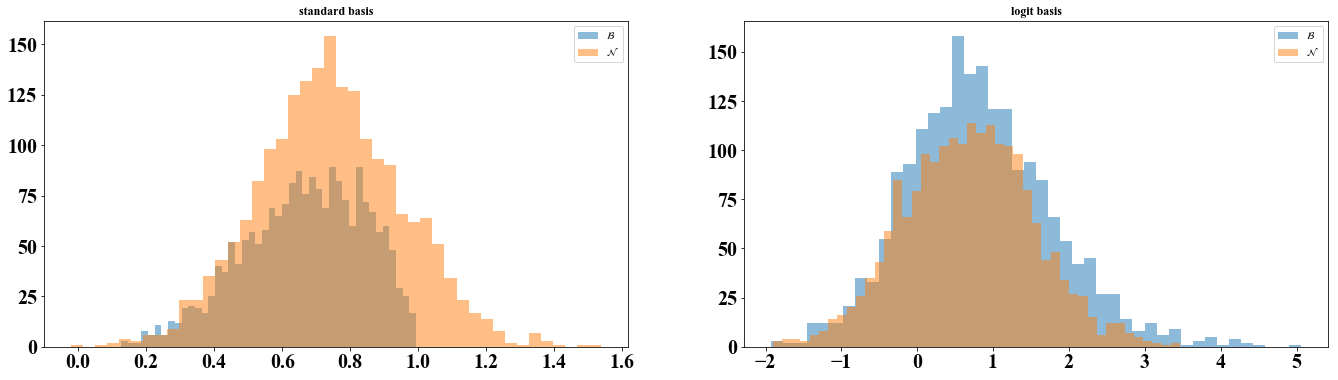

standard:  0.004969656467437744 logit:  0.003126204013824463
a:  4.1 b:  2.6


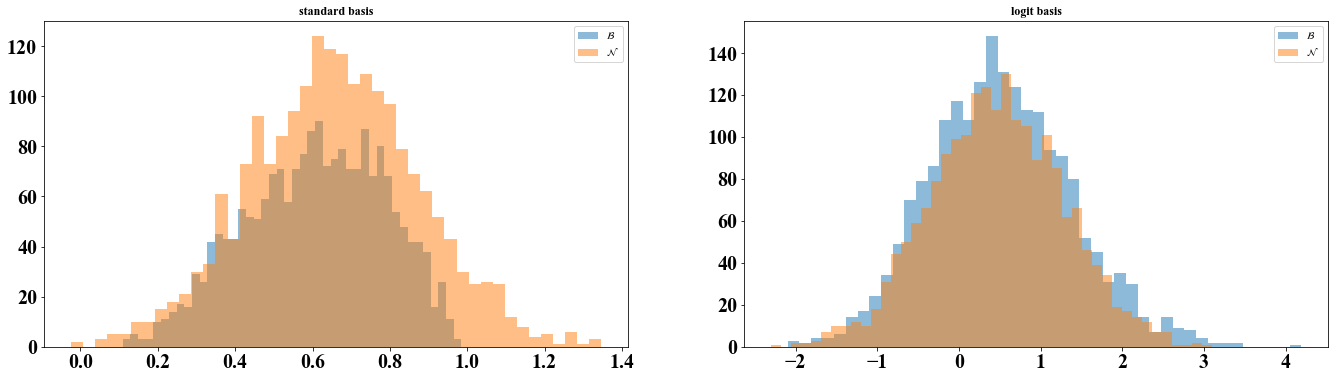

standard:  0.002243936061859131 logit:  0.00037151575088500977
a:  4.1 b:  3.1


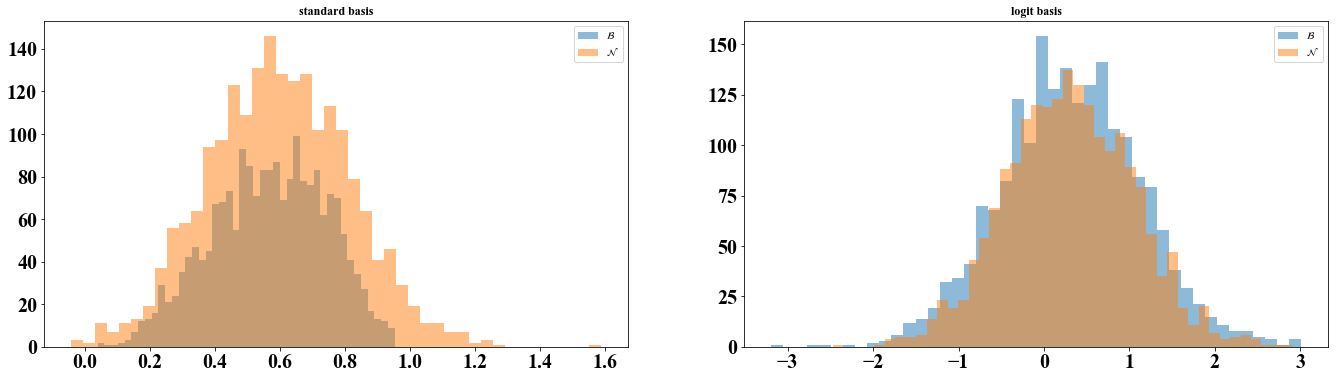

standard:  0.0008724331855773926 logit:  0.0007117986679077148
a:  4.1 b:  3.6


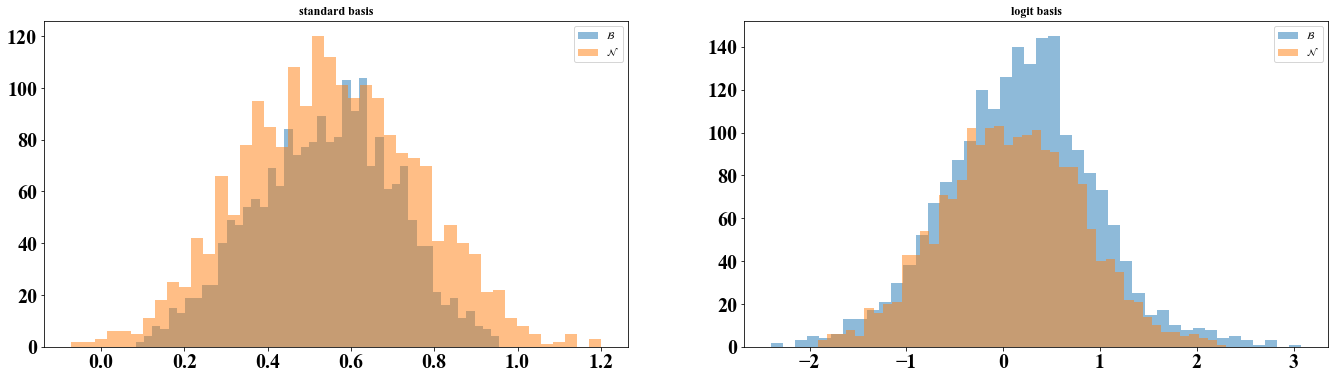

standard:  0.00023323297500610352 logit:  0.001956641674041748
a:  4.1 b:  4.1


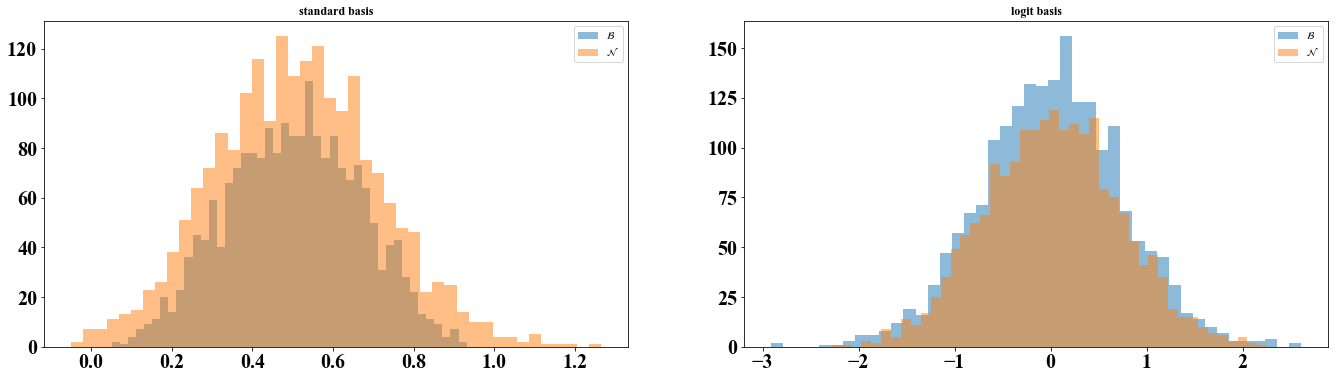

standard:  0.00012874603271484375 logit:  0.0
a:  4.1 b:  4.6


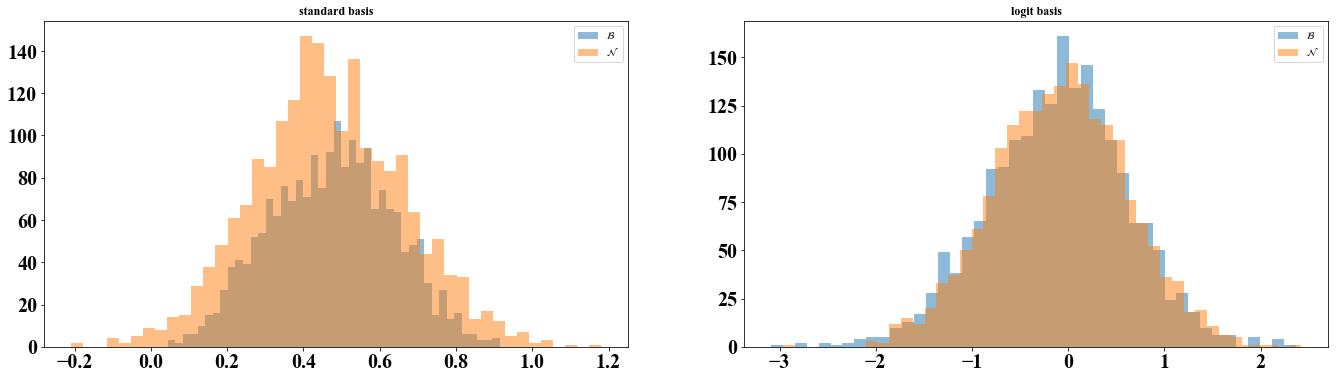

standard:  0.00015544891357421875 logit:  7.987022399902344e-06
a:  4.6 b:  1.1


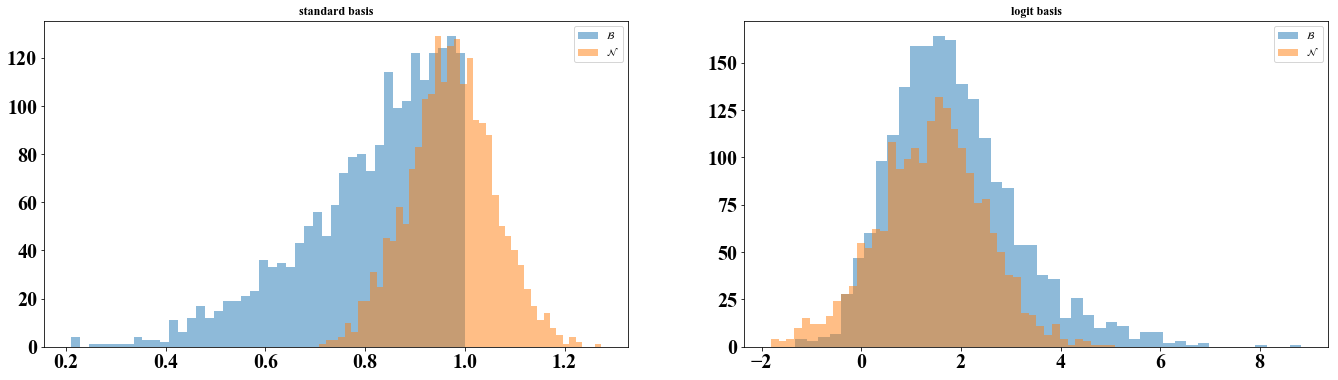

standard:  0.02431279420852661 logit:  0.012614071369171143
a:  4.6 b:  1.6


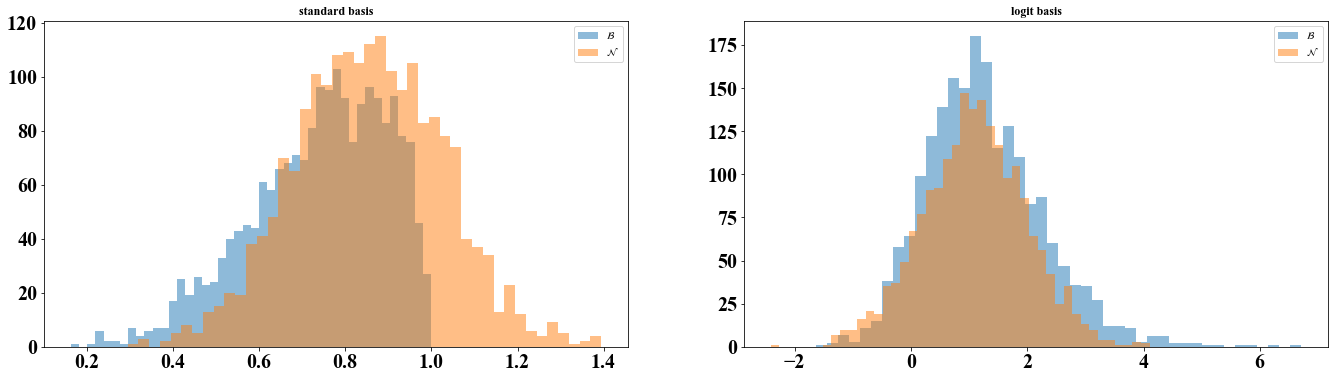

standard:  0.011687278747558594 logit:  0.0028720498085021973
a:  4.6 b:  2.1


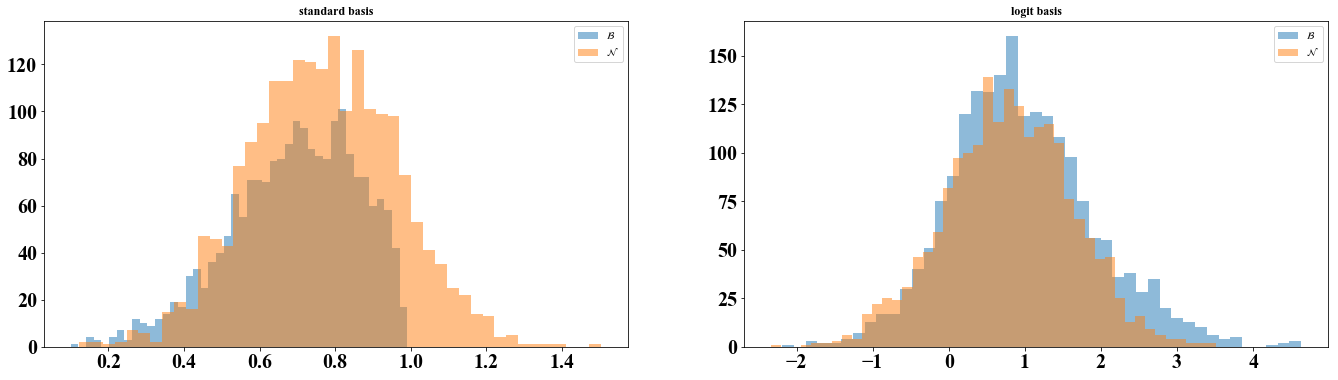

standard:  0.005043923854827881 logit:  0.004596889019012451
a:  4.6 b:  2.6


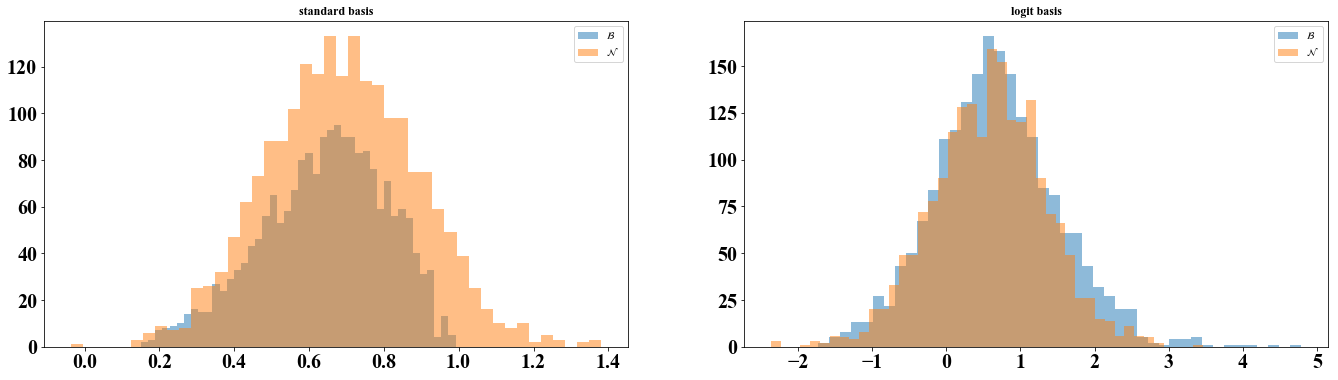

standard:  0.0020467042922973633 logit:  0.0014889240264892578
a:  4.6 b:  3.1


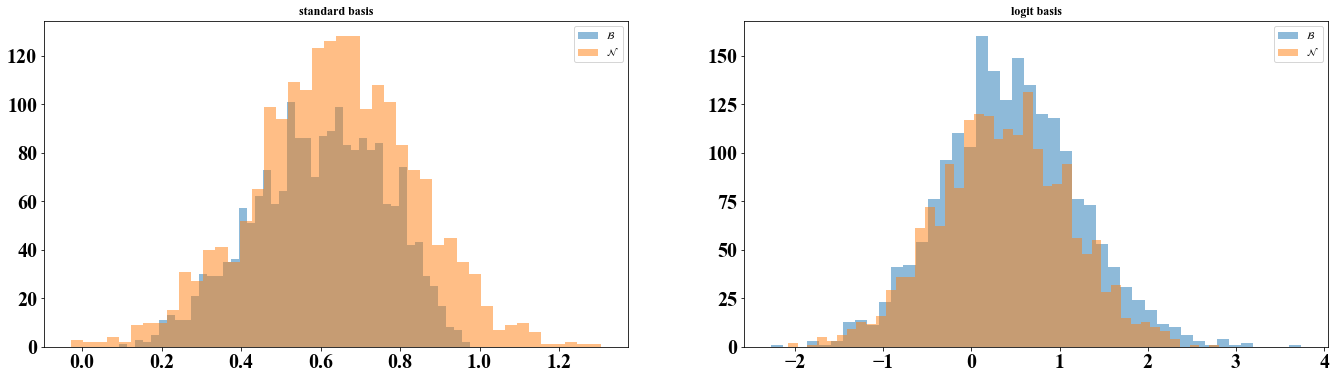

standard:  0.0012604594230651855 logit:  0.0016681551933288574
a:  4.6 b:  3.6


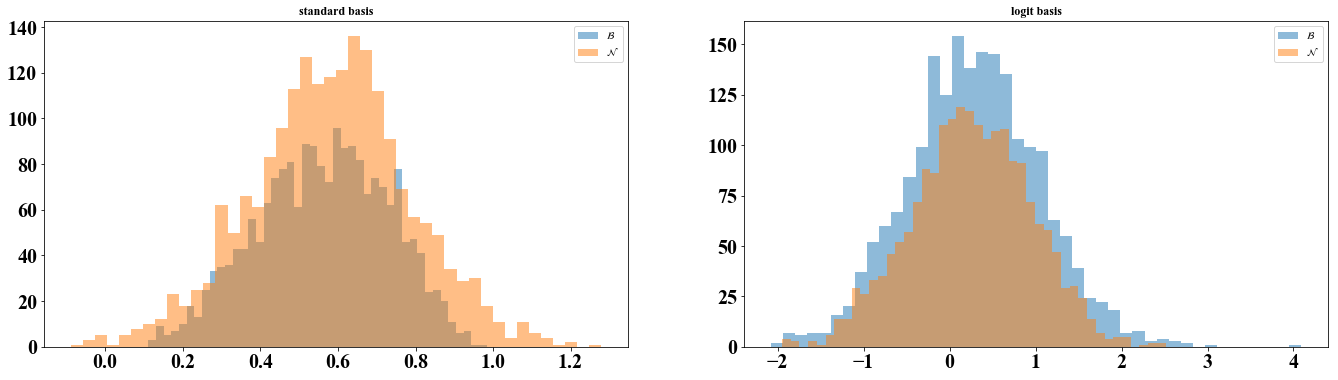

standard:  0.0004515647888183594 logit:  0.0009262561798095703
a:  4.6 b:  4.1


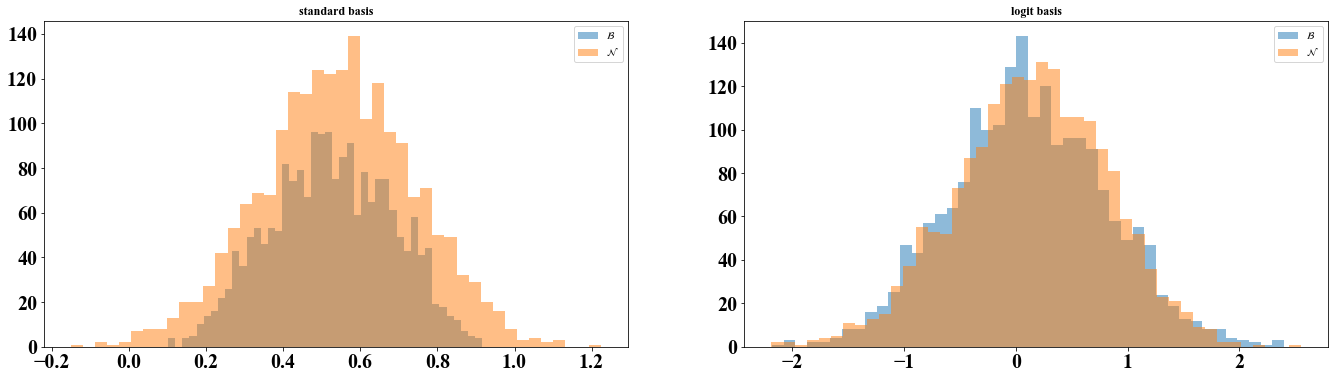

standard:  0.0003247261047363281 logit:  0.0006968975067138672
a:  4.6 b:  4.6


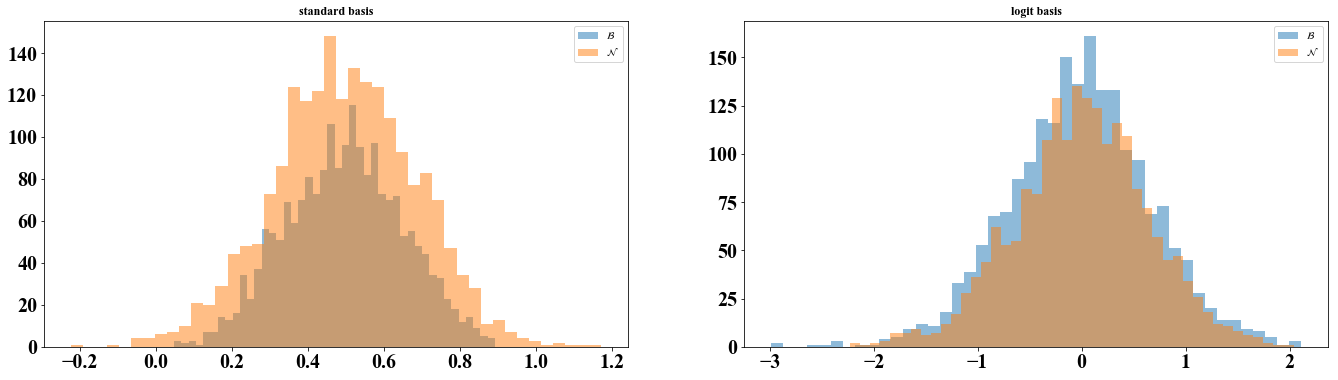

standard:  6.288290023803711e-05 logit:  0.00022125244140625


(0.9425926804542542, 0.2151683270931244)

In [9]:
MMD_combinations(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], plot=True, verbose=True, n_samples=2000)

In [10]:
results_MMD = np.array([0.9365966320037842, 0.2407502830028534])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.25704799]


## KL-divergence (mode seeking/backward, from PDF)

In [11]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [12]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-8] = 1e-8
    pdf_2[pdf_2 < 1e-8] = 1e-8
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))
    
    #fill NaNs with 0
    KL_div = np.nan_to_num(KL_div)

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf_1')
        plt.plot(x_linspace, pdf_2, label='pdf_2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(np.abs(KL_div))
    
    #normalize for comparison
    KL_div /= np.max(pdf_1)
        
    return(KL_div)

In [13]:
def adjust_dist(a, b, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "logit":
        x_large = np.linspace(-100, 100, 1000)
    else:
        x_large = np.linspace(-100, 100, 1000)
        
    if base == "standard":
        
        mode = beta_mu(a, b)
        sigma = np.sqrt(beta_var(a, b))
        
        #get the range of x
        B_pdf_large = beta_pdf(x_large, a, b)
        N_pdf_large = normal_pdf(x_large, mode, sigma)
        range_ = np.max([np.sum(B_pdf_large > 1e-5), np.sum(N_pdf_large > 1e-5)])
        lower = 0.5 - range_/10
        upper = 0.5 + range_/10
        x_plus = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        B_pdf = beta_pdf(x_plus, a, b)
        N_pdf = normal_pdf(x_plus, mode, sigma)
        
        return(x_plus, B_pdf, N_pdf)
    
    if base == "logit":
        
        mode_logit = beta_t_logit_mu(a, b)
        sigma_logit = np.sqrt(beta_t_logit_var(a, b))
        
        #get the range of x
        B_pdf_large = beta_t_logit_pdf(x_large, a, b)
        N_pdf_large = normal_pdf(x_large, mode_logit, sigma_logit)
        range_ = np.max([np.sum(B_pdf_large > 1e-5), np.sum(N_pdf_large > 1e-5)])
        lower = mode_logit - range_/10
        upper = mode_logit + range_/10
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        B_pdf = beta_t_logit_pdf(x, a, b)
        N_pdf = normal_pdf(x, mode_logit, sigma_logit)
        
        return(x, B_pdf, N_pdf)
        
        
        

In [14]:
def KL_div_pdf_combinations(params, plot=False, verbose=True):
    
    As = params[0]
    Bs = params[1]
    
    KL_div_sum = 0
    KL_div_t_logit_sum = 0 

    for a in As:
        for b in Bs:
            
            if verbose:
                print("a: ", a, "b: ", b)
                
            if a < 1 or b < 1:
                print("a < 1 or b < 1: not legitimate in standard base")
                
            if a+b == 2:
                break
            
            #get the ranges and pdfs
            if a >= 1 and b >= 1:
                x, B_pdf, N_pdf = adjust_dist(a,b, 'standard')
            x_logit, B_pdf_logit, N_pdf_logit = adjust_dist(a,b, 'logit')
            
            #calculate the KL divergences for all bases
            if a >= 1 and b >= 1:
                KL_div_ = KL_divergence_pdf(x, B_pdf, N_pdf, plot=plot)
            else:
                KL_div_ = np.nan
            KL_div_logit_ = KL_divergence_pdf(x_logit, B_pdf_logit, N_pdf_logit, plot=plot)
            
            #add them to their respective sums
            if a >= 1 and b >= 1:
                KL_div_sum += KL_div_
            else:
                KL_div_sum += np.nan
                
            KL_div_t_logit_sum += KL_div_logit_
            
            if verbose:
                print("standard: ", KL_div_, "logit: ", KL_div_logit_)
            
            
    return(KL_div_sum, KL_div_t_logit_sum)

a:  1.1 b:  1.1


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


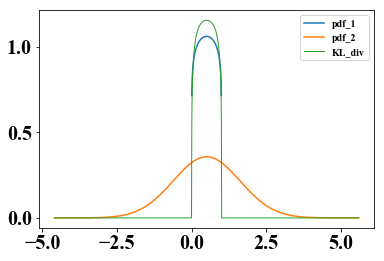

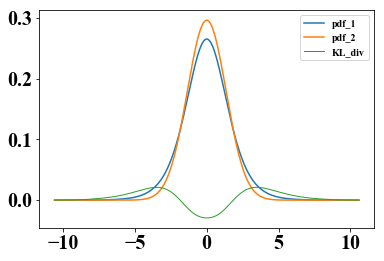

standard:  nan logit:  37.86671230721177
a:  1.1 b:  1.6


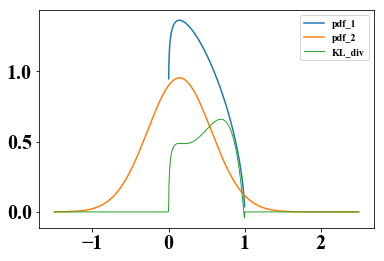

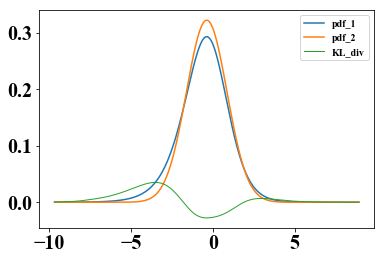

standard:  nan logit:  36.875779122531064
a:  1.1 b:  2.1


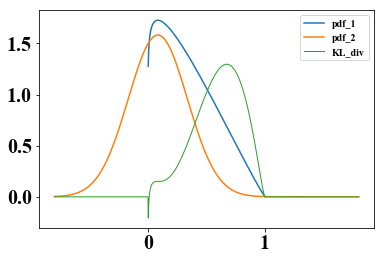

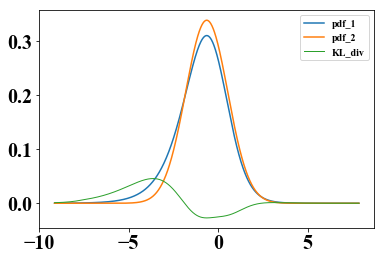

standard:  nan logit:  43.35773385668988
a:  1.1 b:  2.6


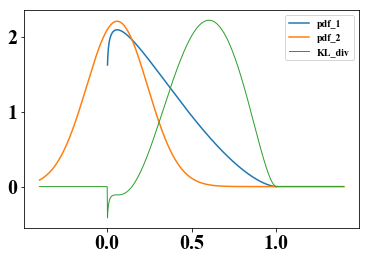

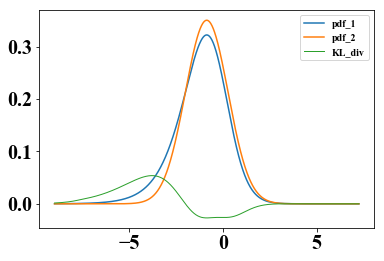

standard:  nan logit:  49.97757231976137
a:  1.1 b:  3.1


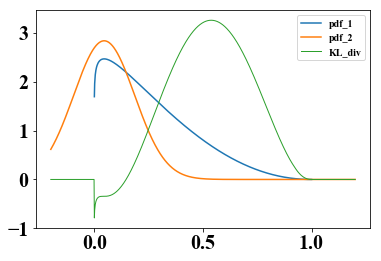

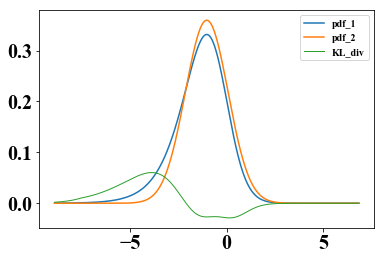

standard:  nan logit:  54.80274262836018
a:  1.1 b:  3.6


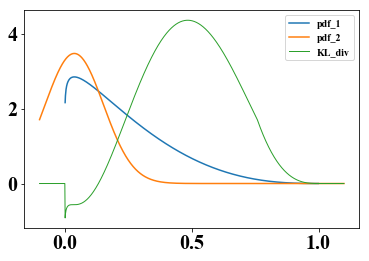

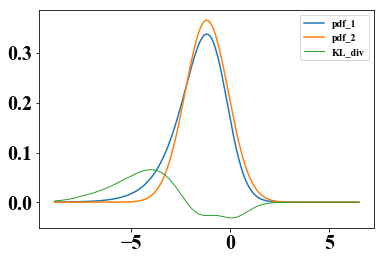

standard:  nan logit:  58.870359363559956
a:  1.1 b:  4.1


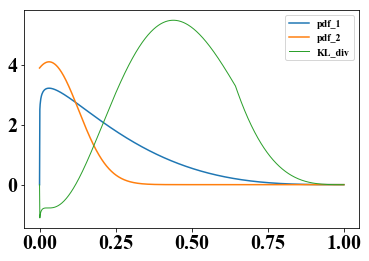

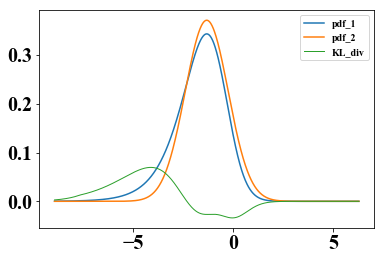

standard:  738.3124116663987 logit:  61.705239187058275
a:  1.1 b:  4.6


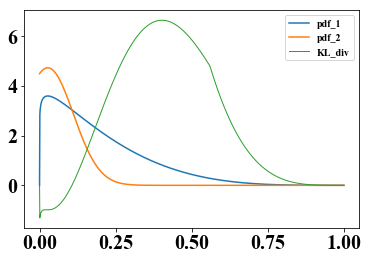

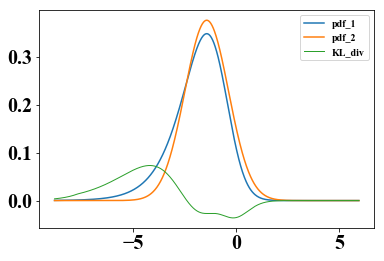

standard:  743.7600527764668 logit:  64.96370252910435
a:  1.6 b:  1.1


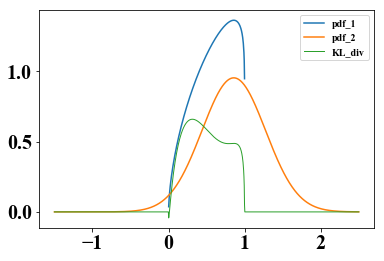

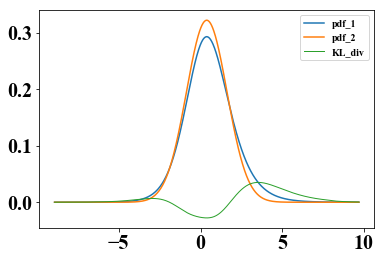

standard:  nan logit:  36.875779122531064
a:  1.6 b:  1.6


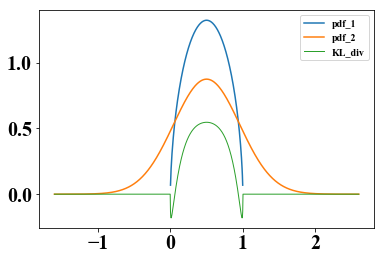

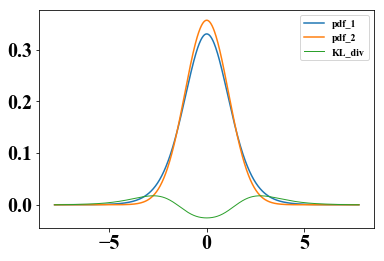

standard:  nan logit:  26.31065814903052
a:  1.6 b:  2.1


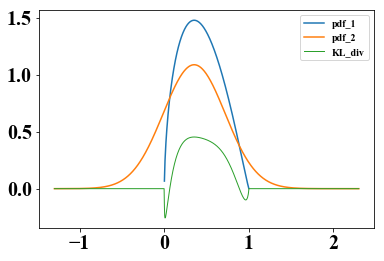

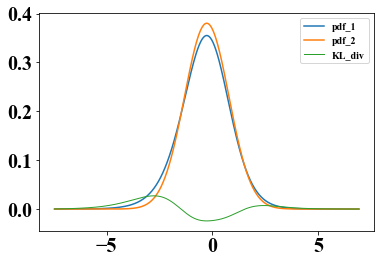

standard:  nan logit:  25.091145000425076
a:  1.6 b:  2.6


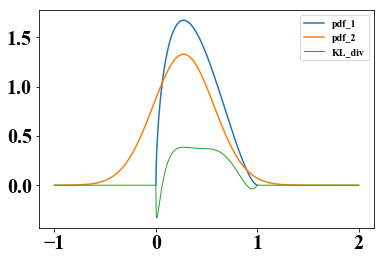

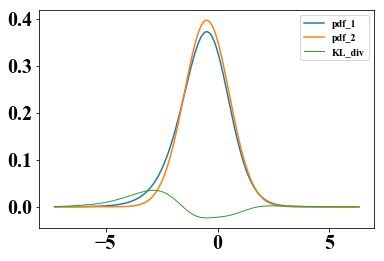

standard:  nan logit:  27.801898013276457
a:  1.6 b:  3.1


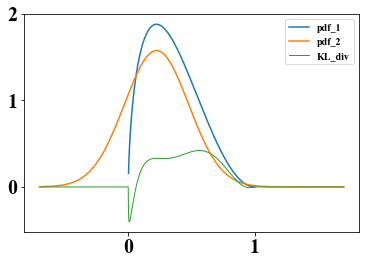

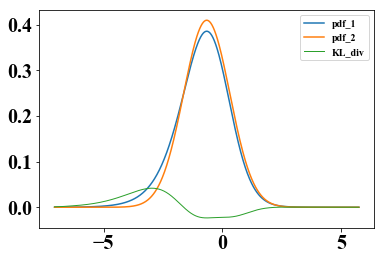

standard:  nan logit:  32.40286798769779
a:  1.6 b:  3.6


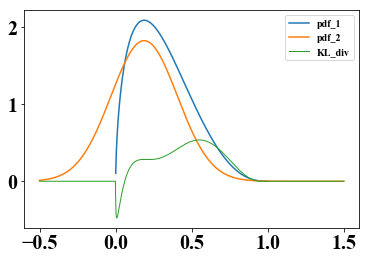

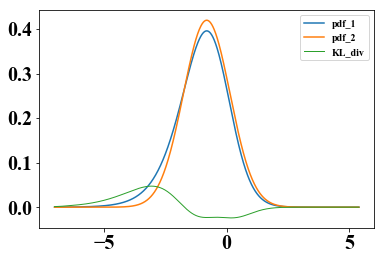

standard:  nan logit:  36.23118224391885
a:  1.6 b:  4.1


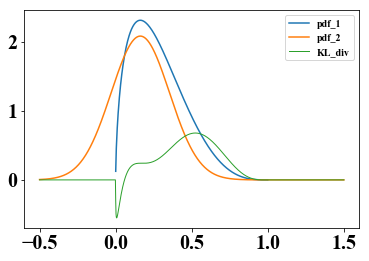

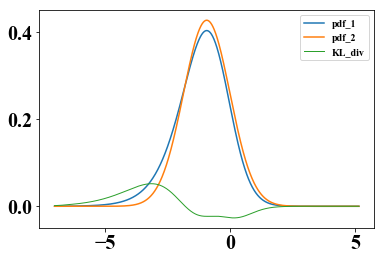

standard:  nan logit:  39.07289113979321
a:  1.6 b:  4.6


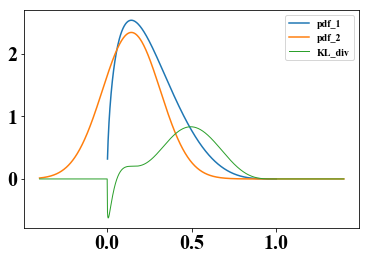

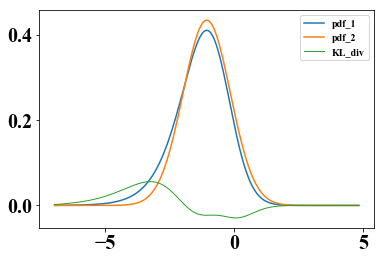

standard:  nan logit:  42.184679284414614
a:  2.1 b:  1.1


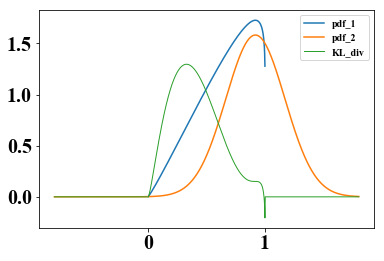

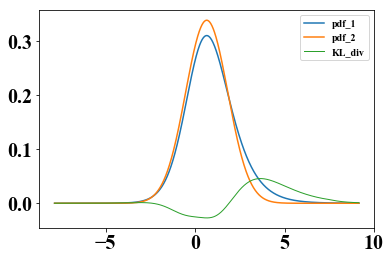

standard:  nan logit:  43.35773385668996
a:  2.1 b:  1.6


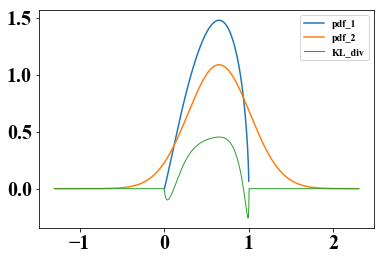

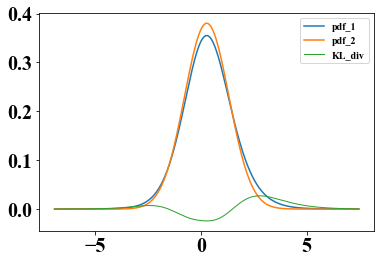

standard:  nan logit:  25.09114500042508
a:  2.1 b:  2.1


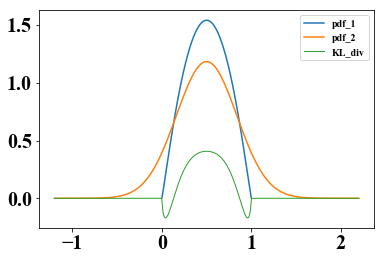

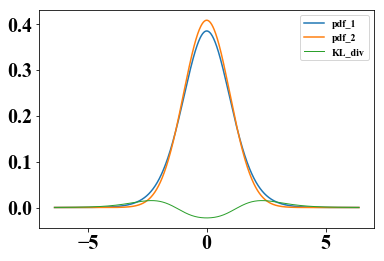

standard:  nan logit:  19.996239596358663
a:  2.1 b:  2.6


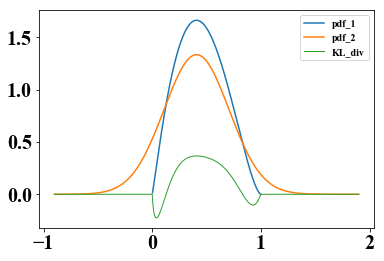

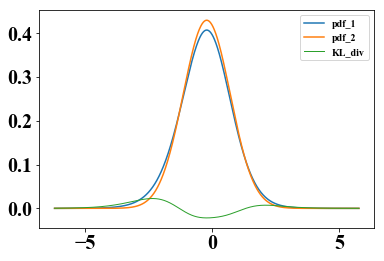

standard:  nan logit:  19.186637764624173
a:  2.1 b:  3.1


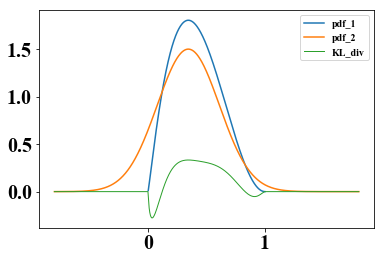

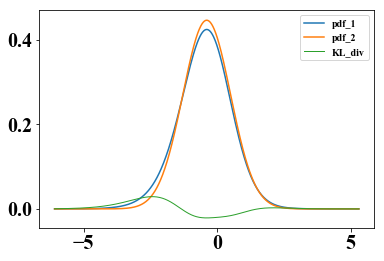

standard:  nan logit:  20.767468849601837
a:  2.1 b:  3.6


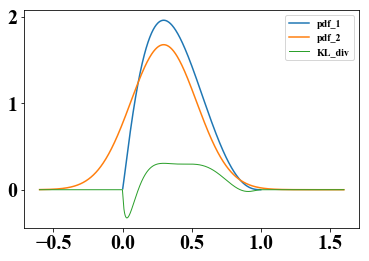

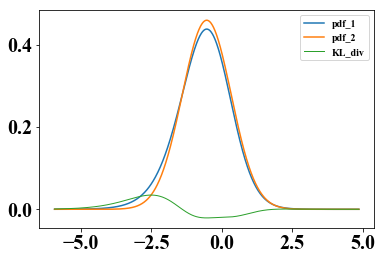

standard:  nan logit:  23.84378769152538
a:  2.1 b:  4.1


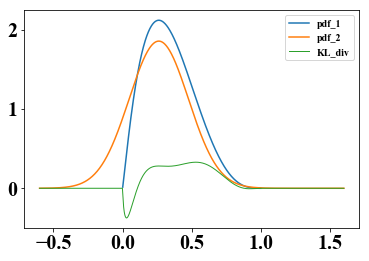

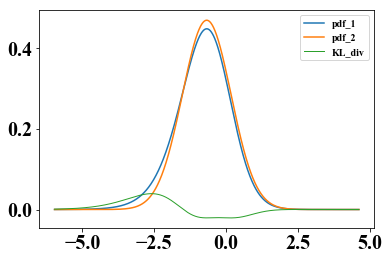

standard:  nan logit:  26.466432832306307
a:  2.1 b:  4.6


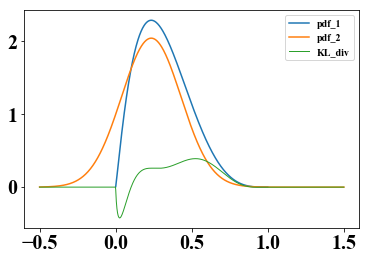

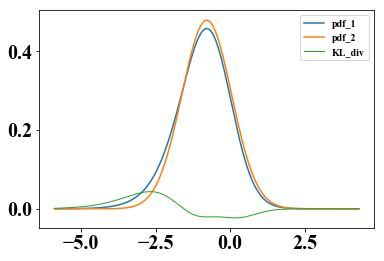

standard:  nan logit:  29.415697563240165
a:  2.6 b:  1.1


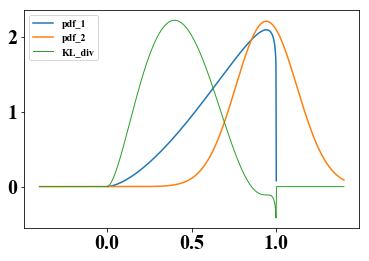

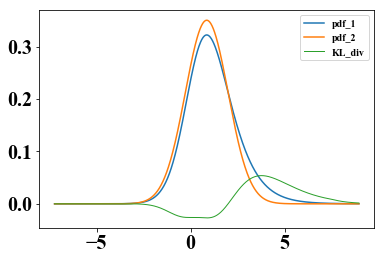

standard:  nan logit:  49.977572319761386
a:  2.6 b:  1.6


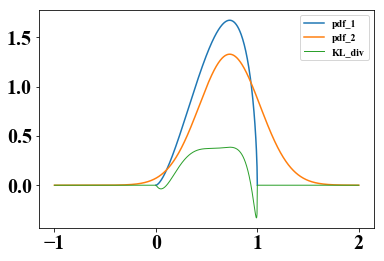

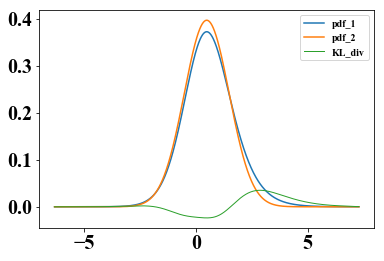

standard:  nan logit:  27.80189801327647
a:  2.6 b:  2.1


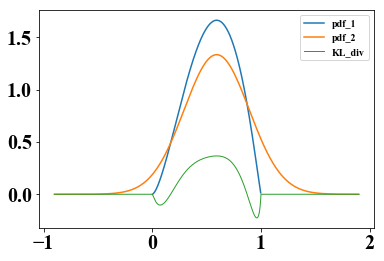

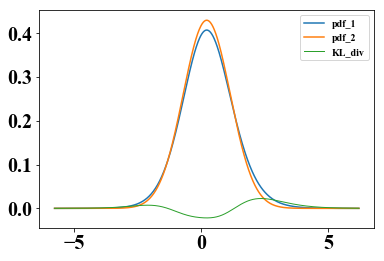

standard:  nan logit:  19.18663776462417
a:  2.6 b:  2.6


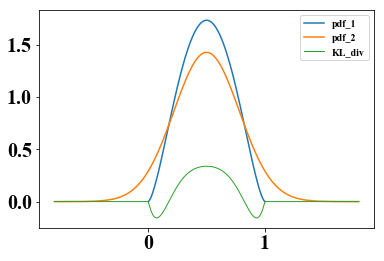

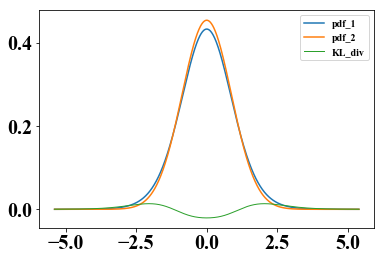

standard:  nan logit:  16.49070457946831
a:  2.6 b:  3.1


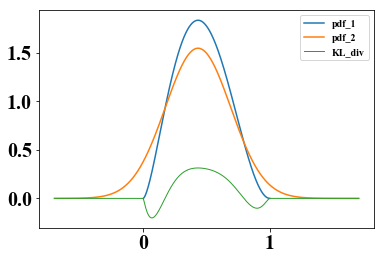

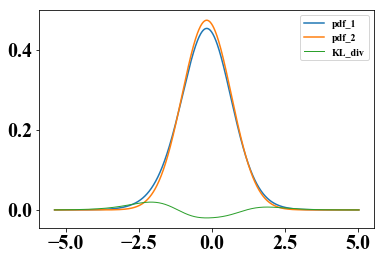

standard:  nan logit:  15.653058209714066
a:  2.6 b:  3.6


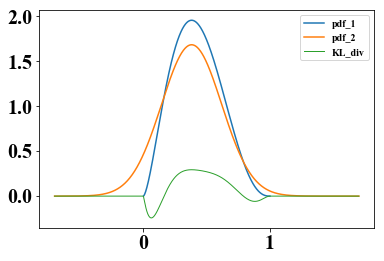

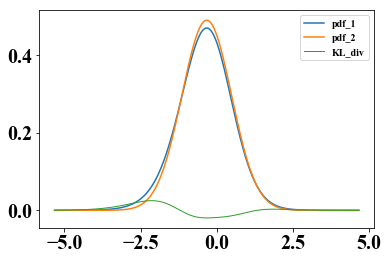

standard:  nan logit:  16.559192363129135
a:  2.6 b:  4.1


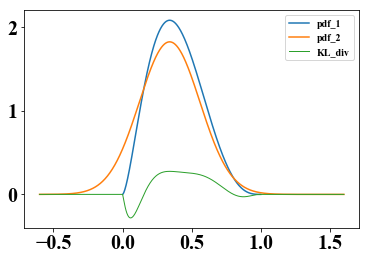

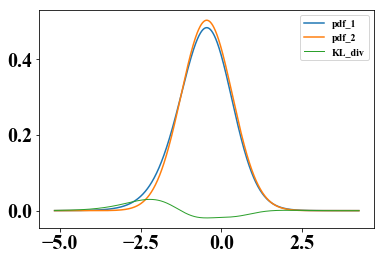

standard:  nan logit:  18.966059575370885
a:  2.6 b:  4.6


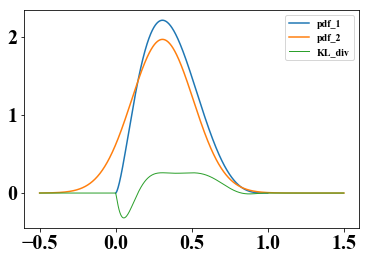

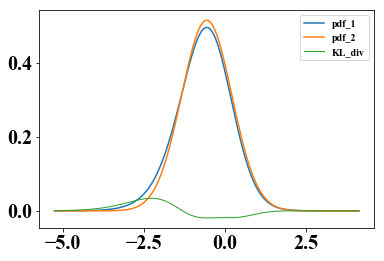

standard:  nan logit:  20.680664145849402
a:  3.1 b:  1.1


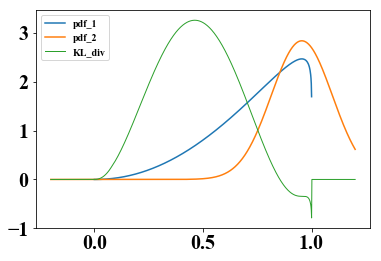

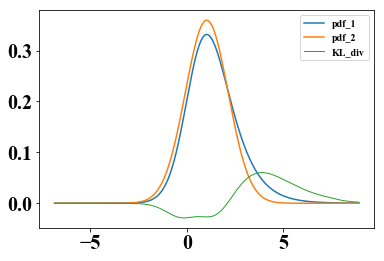

standard:  nan logit:  54.80274262836021
a:  3.1 b:  1.6


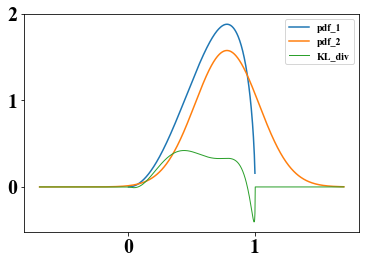

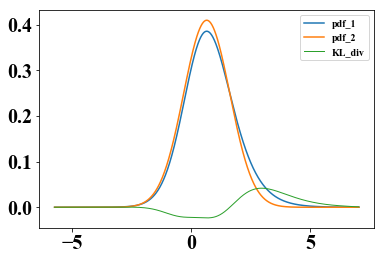

standard:  nan logit:  32.4028679876978
a:  3.1 b:  2.1


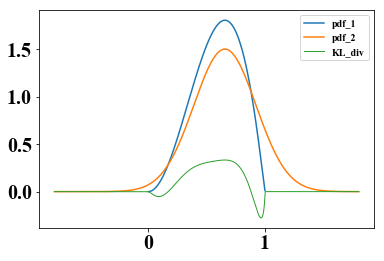

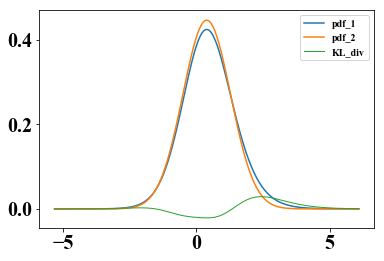

standard:  nan logit:  20.767468849601844
a:  3.1 b:  2.6


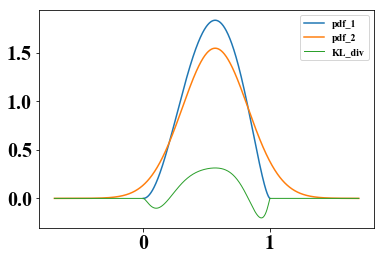

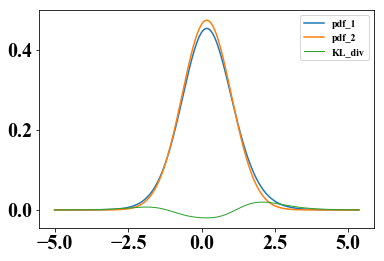

standard:  nan logit:  15.653058209714072
a:  3.1 b:  3.1


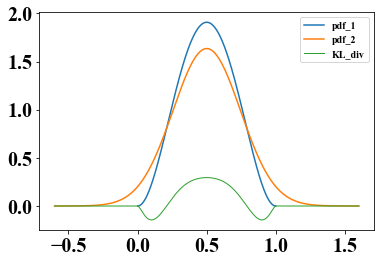

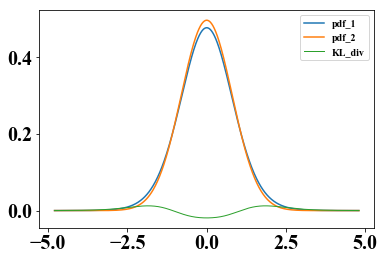

standard:  nan logit:  13.836024518148017
a:  3.1 b:  3.6


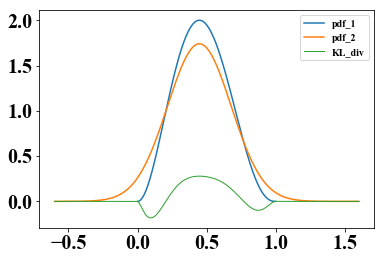

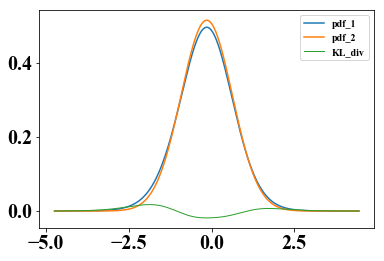

standard:  nan logit:  13.352706209608696
a:  3.1 b:  4.1


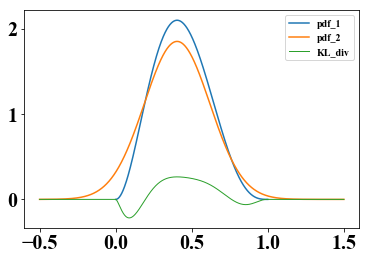

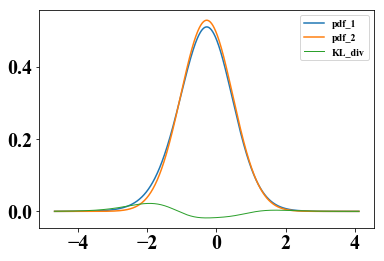

standard:  nan logit:  14.098457763399143
a:  3.1 b:  4.6


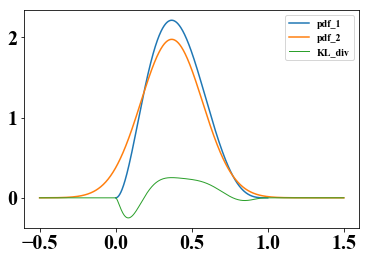

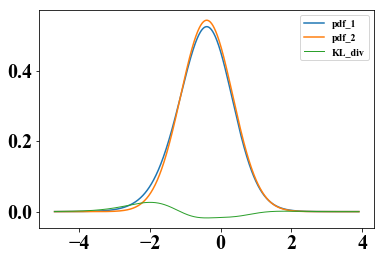

standard:  nan logit:  15.399450466198603
a:  3.6 b:  1.1


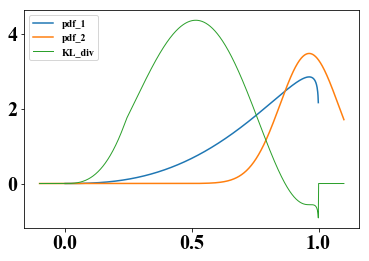

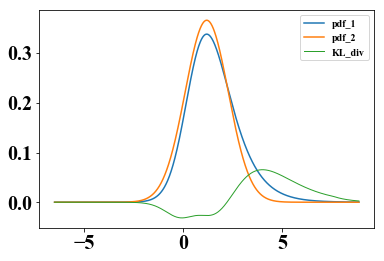

standard:  nan logit:  58.8703593635599
a:  3.6 b:  1.6


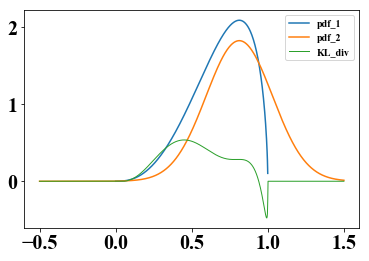

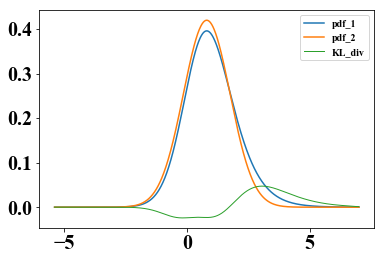

standard:  nan logit:  36.23118224391885
a:  3.6 b:  2.1


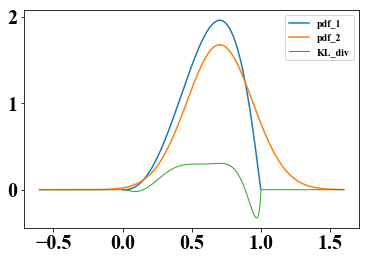

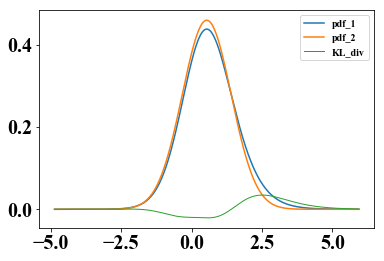

standard:  nan logit:  23.843787691525367
a:  3.6 b:  2.6


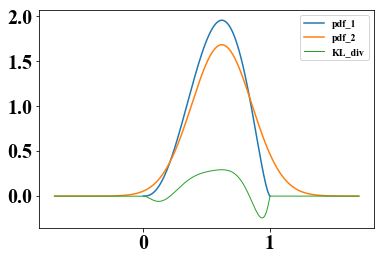

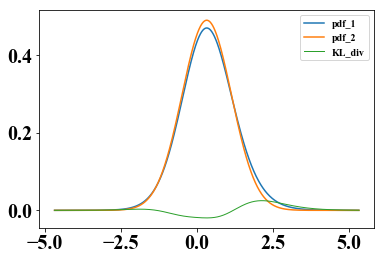

standard:  nan logit:  16.55919236312912
a:  3.6 b:  3.1


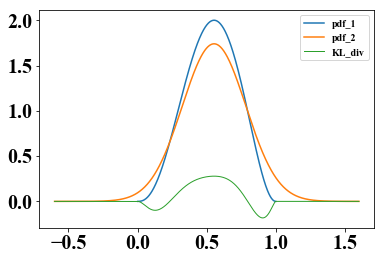

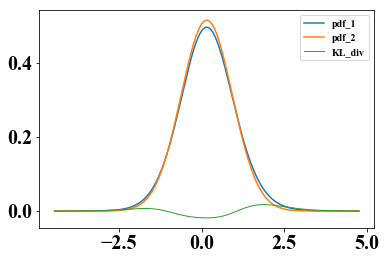

standard:  nan logit:  13.352706209608682
a:  3.6 b:  3.6


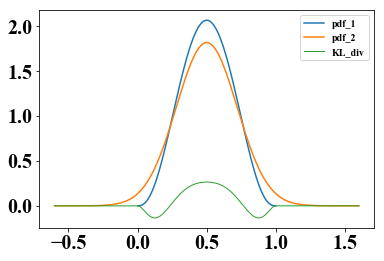

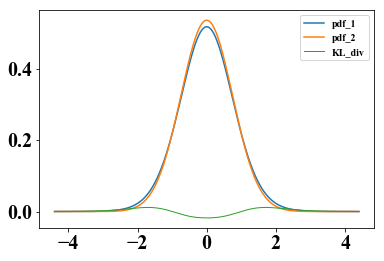

standard:  nan logit:  11.8033122359171
a:  3.6 b:  4.1


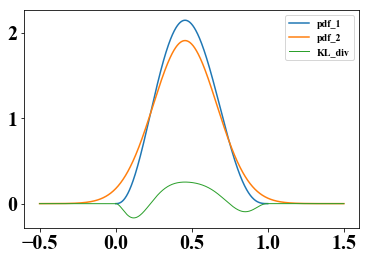

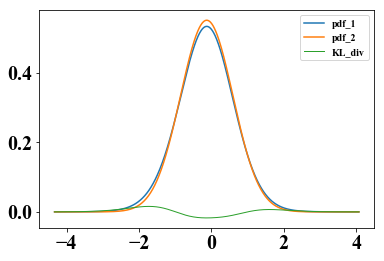

standard:  nan logit:  11.541317441346166
a:  3.6 b:  4.6


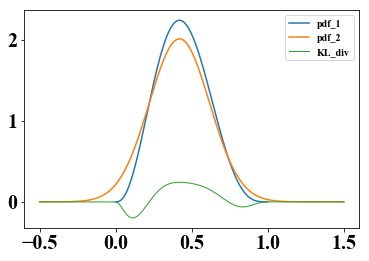

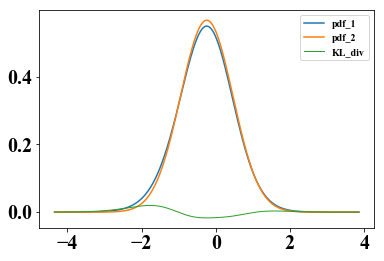

standard:  nan logit:  11.889052254420811
a:  4.1 b:  1.1


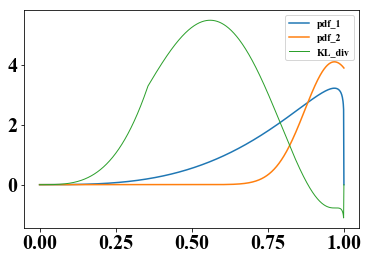

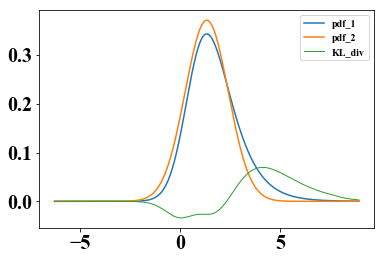

standard:  738.3124116663995 logit:  61.705239187058254
a:  4.1 b:  1.6


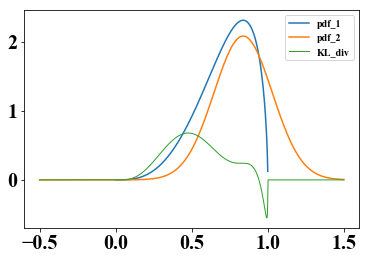

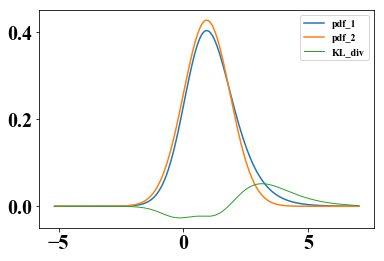

standard:  nan logit:  39.07289113979319
a:  4.1 b:  2.1


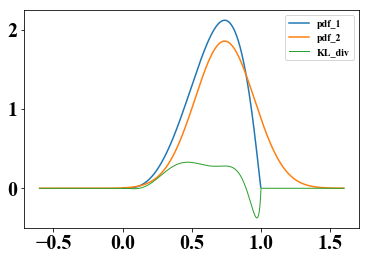

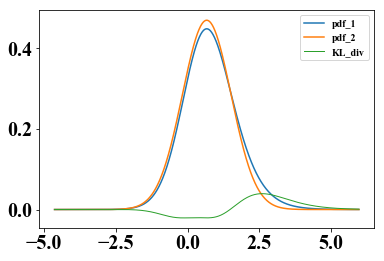

standard:  nan logit:  26.466432832306328
a:  4.1 b:  2.6


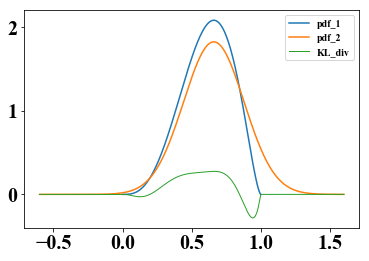

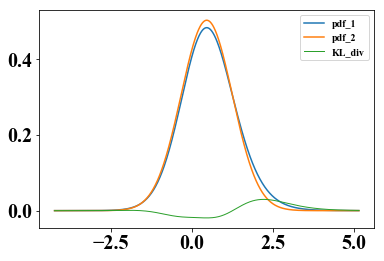

standard:  nan logit:  18.966059575370906
a:  4.1 b:  3.1


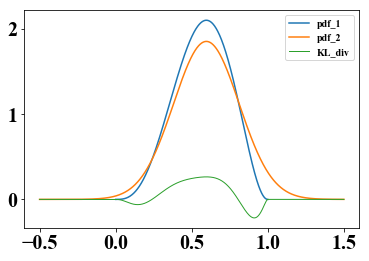

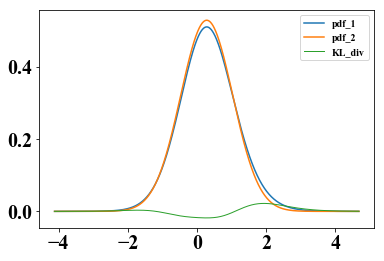

standard:  nan logit:  14.098457763399146
a:  4.1 b:  3.6


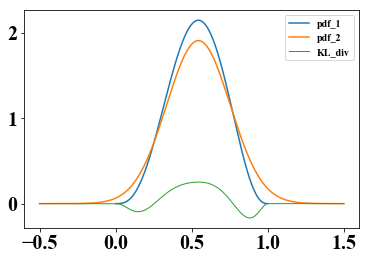

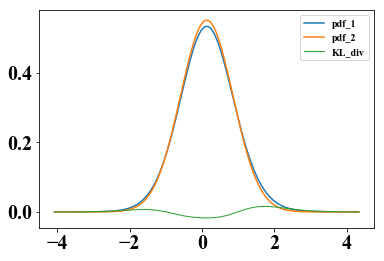

standard:  nan logit:  11.541317441346157
a:  4.1 b:  4.1


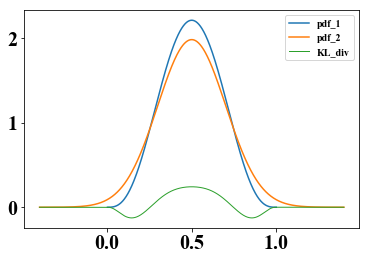

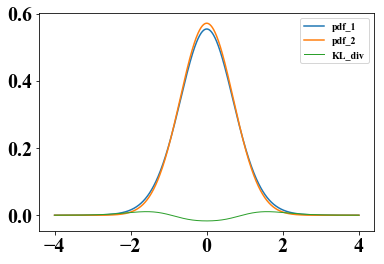

standard:  nan logit:  10.504999741267454
a:  4.1 b:  4.6


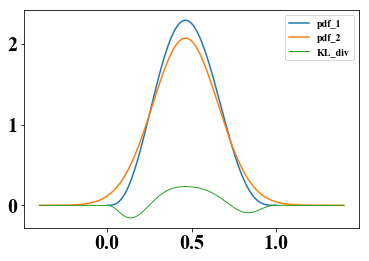

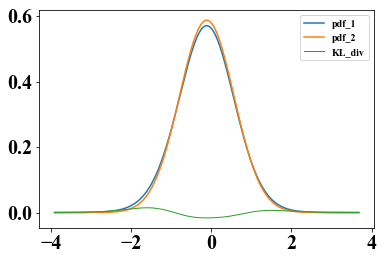

standard:  nan logit:  10.395640695686616
a:  4.6 b:  1.1


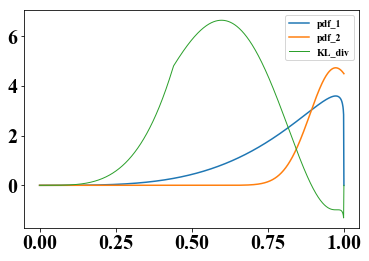

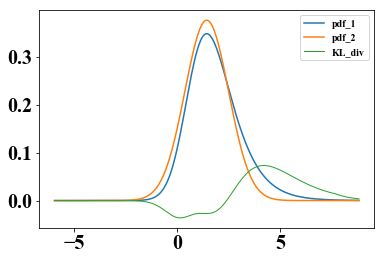

standard:  743.7600527764674 logit:  64.96370252910442
a:  4.6 b:  1.6


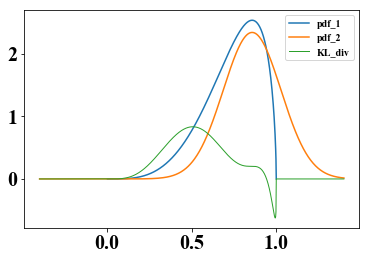

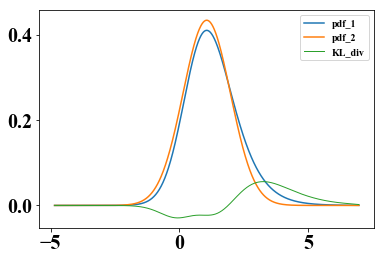

standard:  nan logit:  42.184679284414614
a:  4.6 b:  2.1


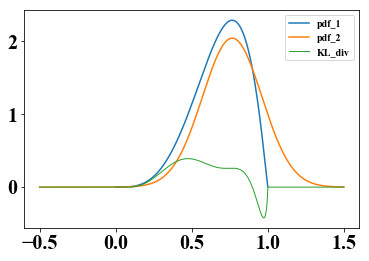

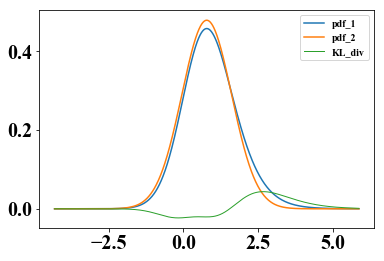

standard:  nan logit:  29.415697563240165
a:  4.6 b:  2.6


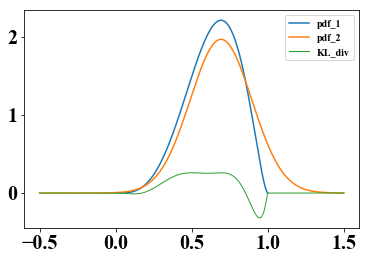

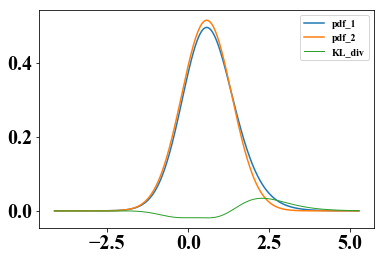

standard:  nan logit:  20.680664145849395
a:  4.6 b:  3.1


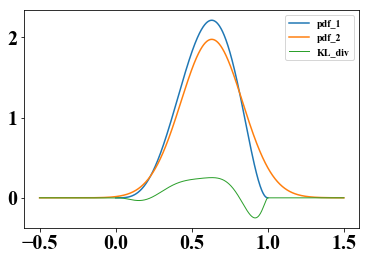

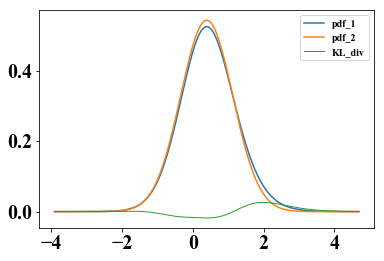

standard:  nan logit:  15.399450466198603
a:  4.6 b:  3.6


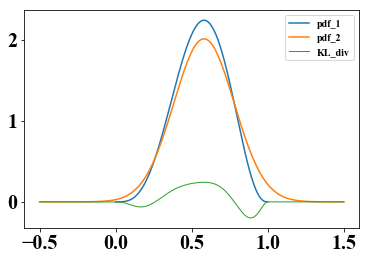

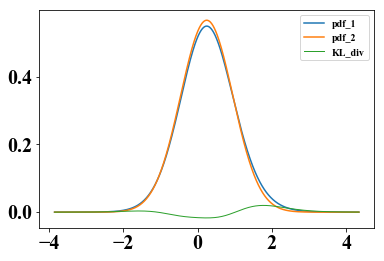

standard:  nan logit:  11.889052254420815
a:  4.6 b:  4.1


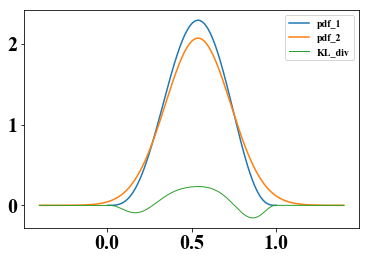

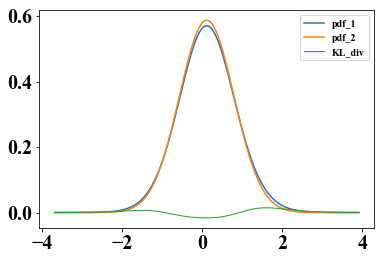

standard:  nan logit:  10.395640695686618
a:  4.6 b:  4.6


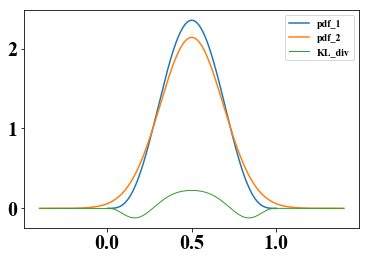

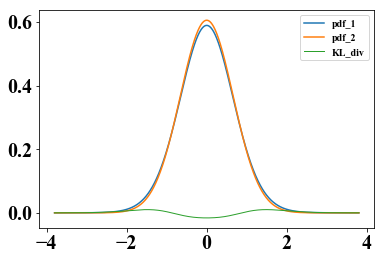

standard:  nan logit:  9.185041575551821
(nan, 1829.1005257081797)


In [15]:
print(KL_div_pdf_combinations(params=[np.arange(1.1, 5.1, 0.5), np.arange(1.1, 5.1, 0.5)], plot=True, verbose=True))

In [16]:
results_KL_pdf = np.array([21361.36577717092, 708.1665439705503])
results_KL_pdf_normed = results_KL_pdf/results_KL_pdf[0]
print(results_KL_pdf_normed)

[1.         0.03315174]


# Statistical distance measures for small, medium and large $\theta$

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:897: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide

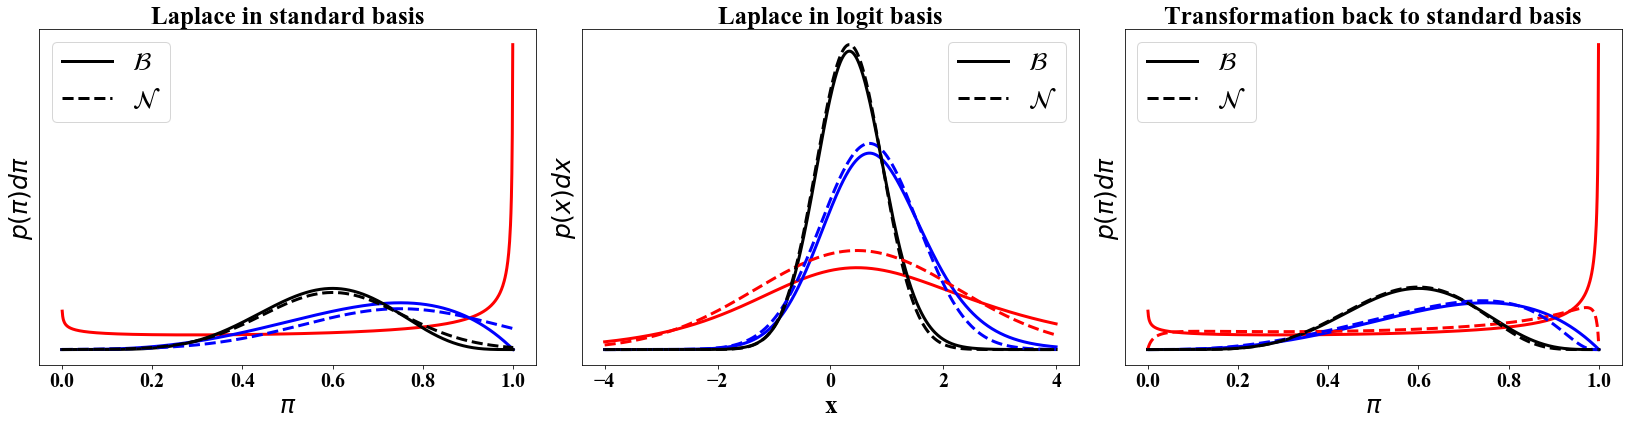

In [17]:
a_s, b_s = 0.8, 0.5
a_m, b_m = 4,2
a_l, b_l = 7,5
plot_beta_t_logit(params=[[a_s, b_s], [a_m, b_m], [a_l, b_l]])

## calculate MMD for the three pairs of parameters

seed:  0
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.012014329433441162
a:  4 b:  2
standard:  0.006939589977264404 logit:  0.0016475915908813477
a:  7 b:  5


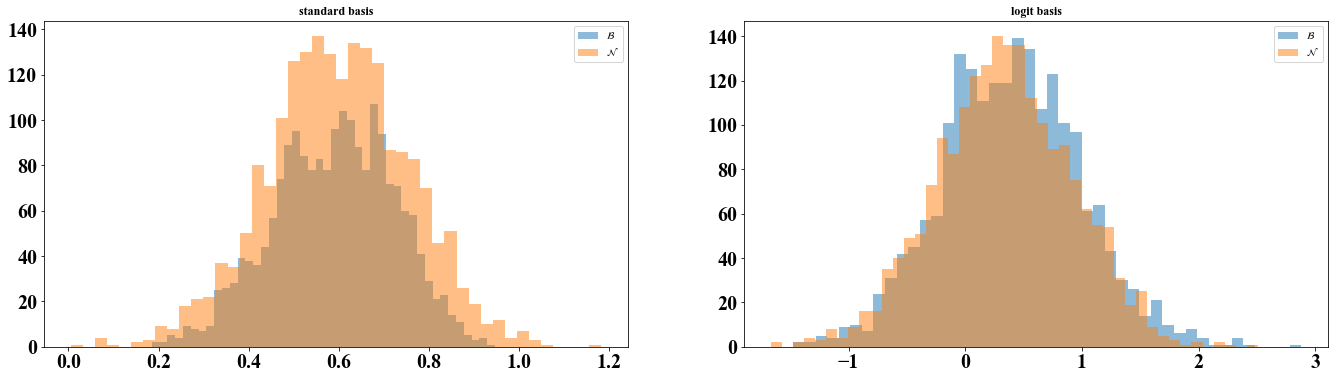

standard:  7.301568984985352e-05 logit:  0.0010191798210144043
seed:  1
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.011222034692764282
a:  4 b:  2
standard:  0.0066031813621521 logit:  0.0031464099884033203
a:  7 b:  5


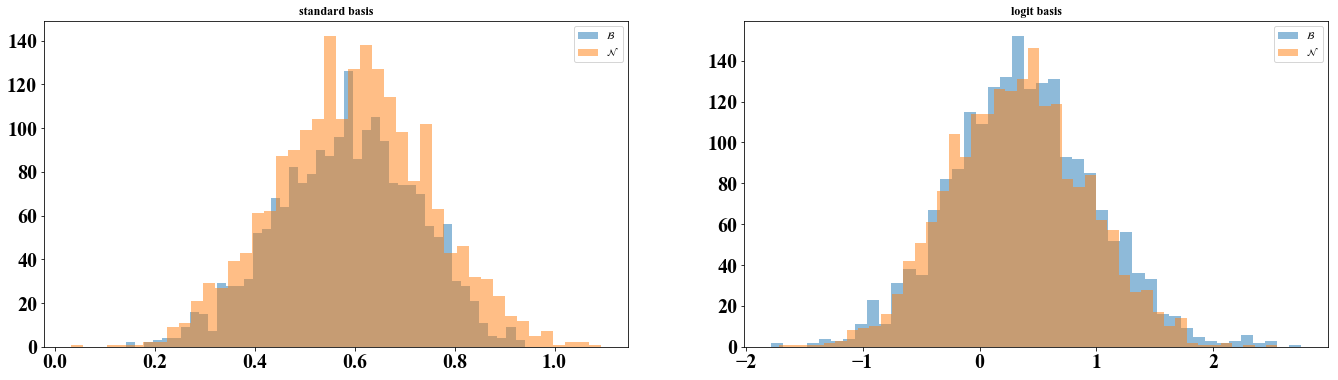

standard:  0.00010603666305541992 logit:  0.000841677188873291
seed:  2
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.012215793132781982
a:  4 b:  2
standard:  0.007103621959686279 logit:  0.001752316951751709
a:  7 b:  5


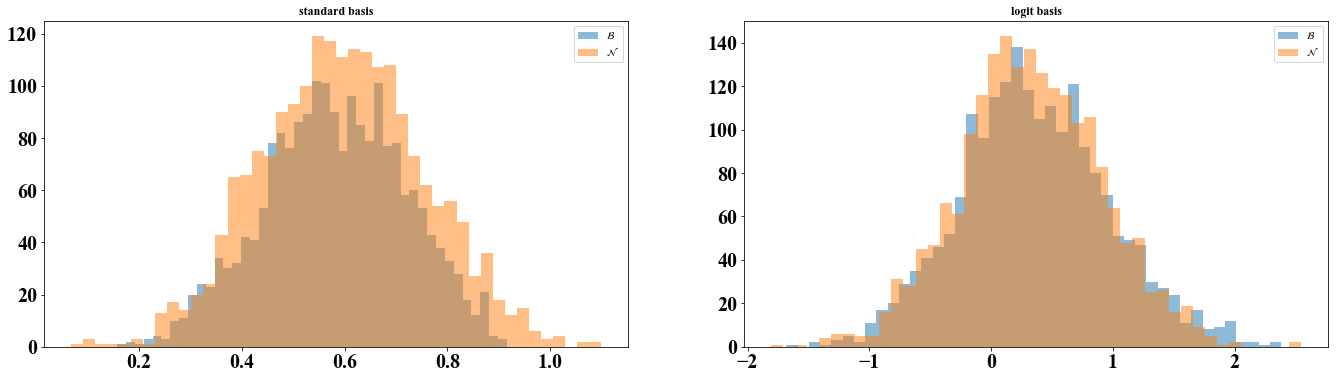

standard:  0.00022989511489868164 logit:  0.0003730654716491699
seed:  3
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.014719188213348389
a:  4 b:  2
standard:  0.006532728672027588 logit:  0.0025659799575805664
a:  7 b:  5


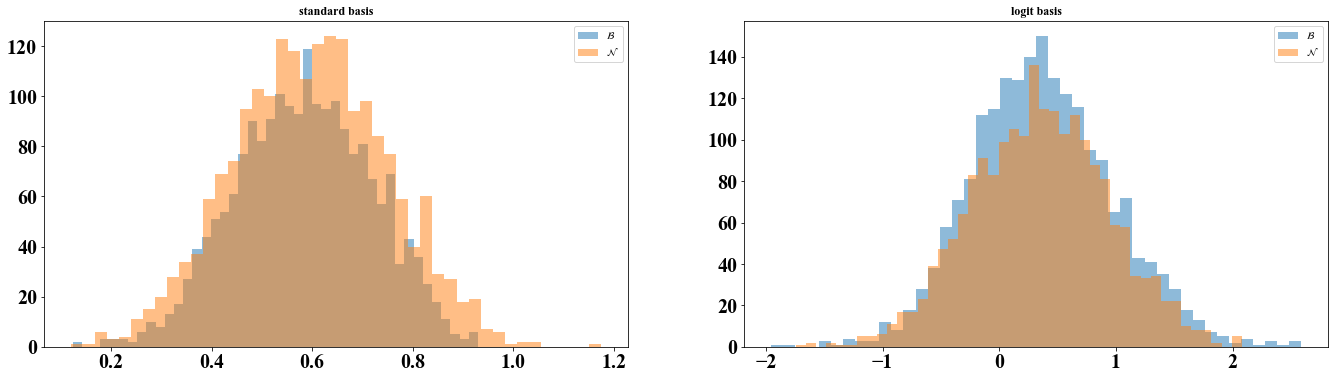

standard:  0.00014728307723999023 logit:  0.0
seed:  4
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.014577031135559082
a:  4 b:  2
standard:  0.0065048933029174805 logit:  0.0034673213958740234
a:  7 b:  5


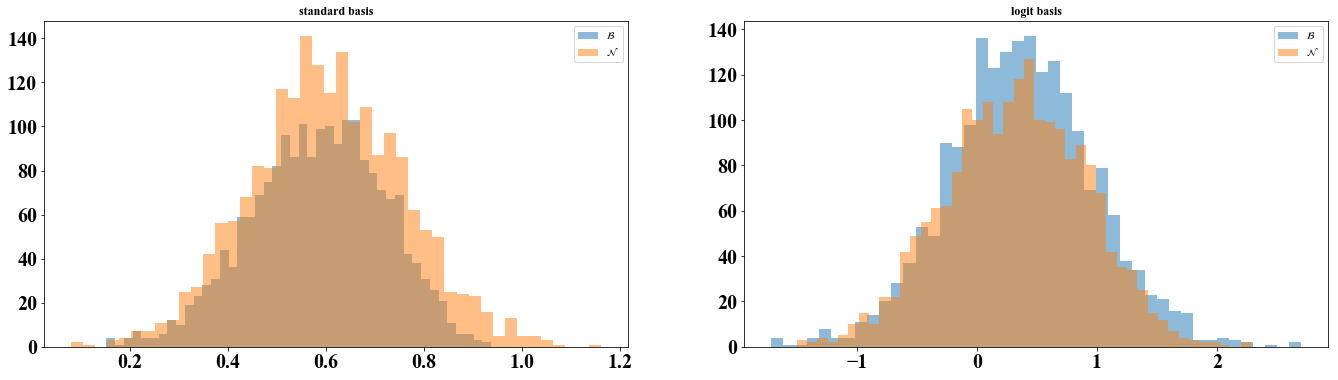

standard:  0.00033086538314819336 logit:  0.0005698800086975098
seed:  5
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.01167646050453186
a:  4 b:  2
standard:  0.006627261638641357 logit:  0.0026376843452453613
a:  7 b:  5


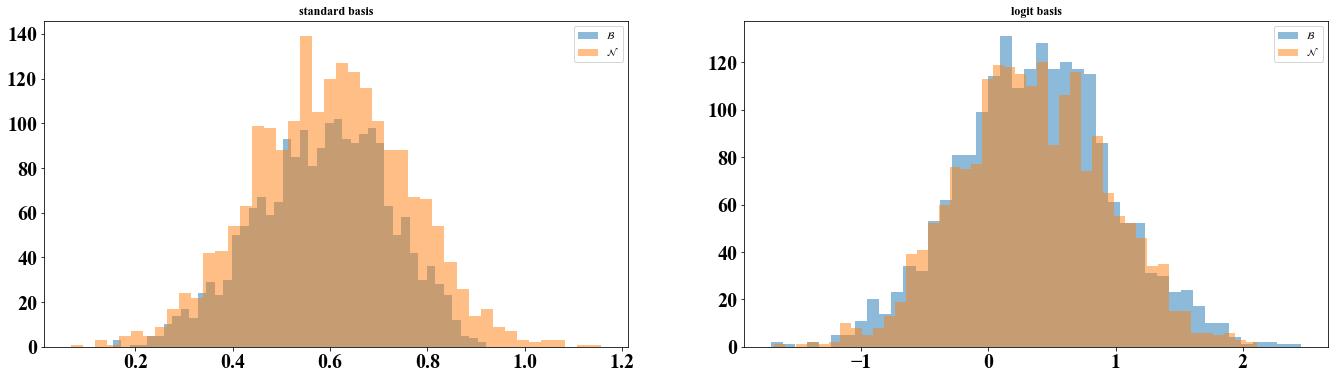

standard:  0.00019276142120361328 logit:  0.00017058849334716797
seed:  6
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.015817254781723022
a:  4 b:  2
standard:  0.0061501264572143555 logit:  0.0017998218536376953
a:  7 b:  5


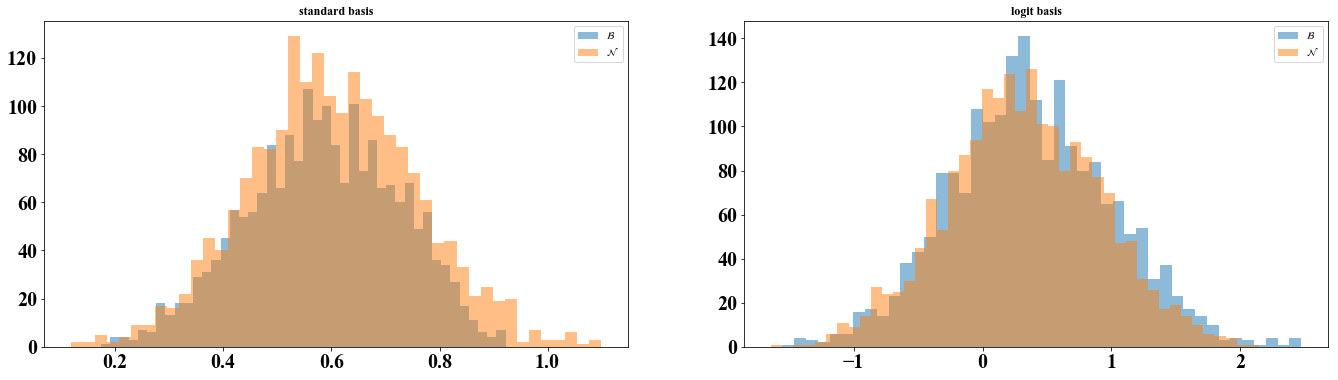

standard:  0.00024372339248657227 logit:  0.001101374626159668
seed:  7
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.015067636966705322
a:  4 b:  2
standard:  0.006160378456115723 logit:  0.004197537899017334
a:  7 b:  5


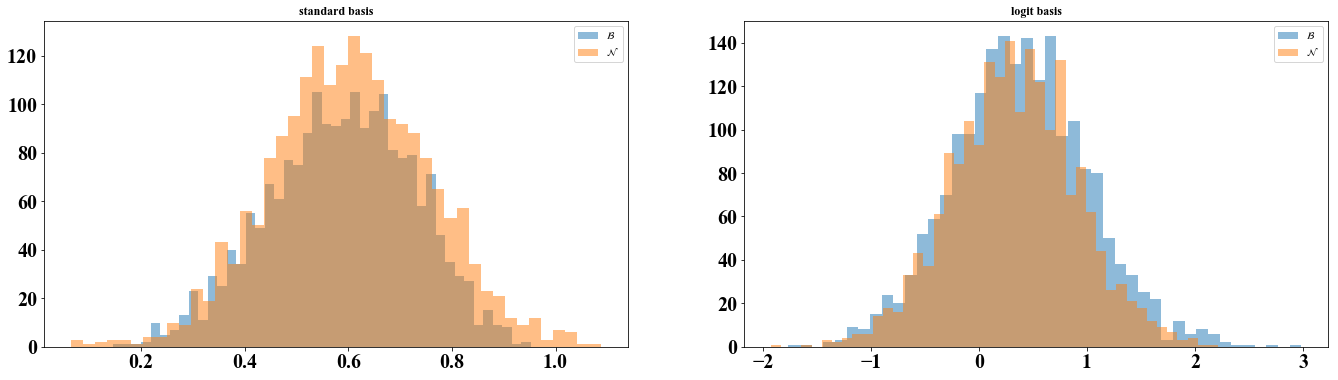

standard:  0.00022995471954345703 logit:  0.0014638900756835938
seed:  8
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.011353224515914917
a:  4 b:  2
standard:  0.006209313869476318 logit:  0.002568840980529785
a:  7 b:  5


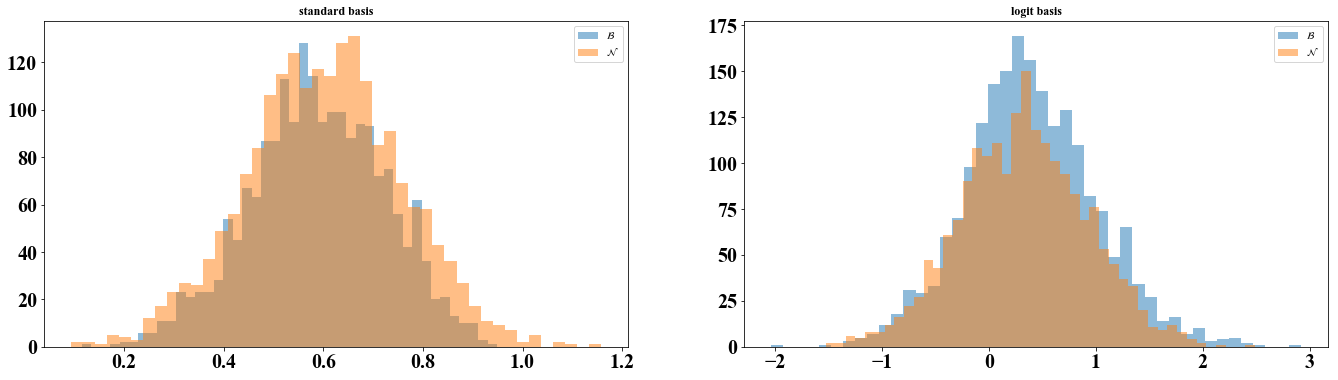

standard:  0.00014322996139526367 logit:  0.0014276504516601562
seed:  9
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  0.011298149824142456
a:  4 b:  2
standard:  0.00678253173828125 logit:  0.0007564425468444824
a:  7 b:  5


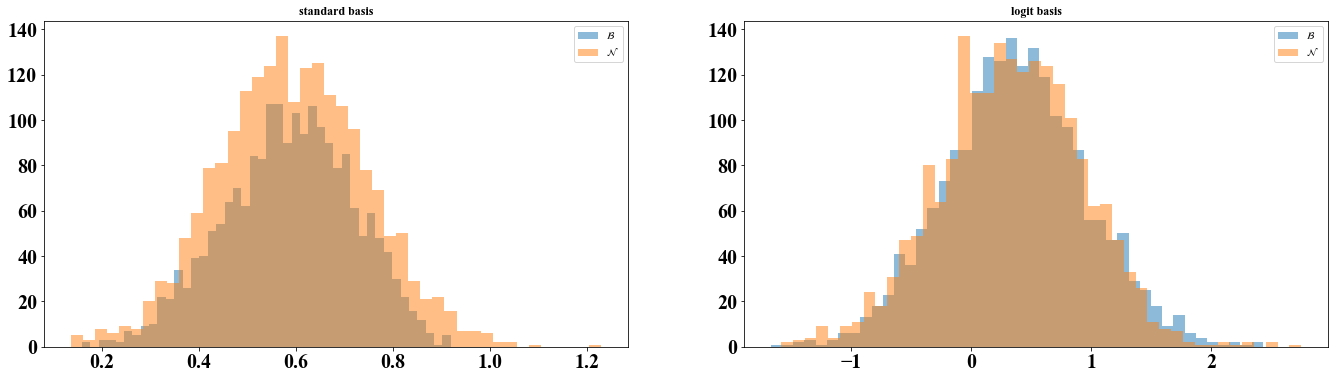

standard:  3.463029861450195e-05 logit:  0.00039780139923095703
[       nan 0.01299611]
[0.00656136 0.00245399]
[0.00017314 0.00073651]


In [18]:
# use 10 seeds
MMD_results_s = []
MMD_results_m = []
MMD_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    torch.manual_seed(s)
    MMD_s = MMD_combinations(params = [[a_s], [b_s]], n_samples=2000)
    MMD_m = MMD_combinations(params = [[a_m], [b_m]], n_samples=2000)
    MMD_l = MMD_combinations(params = [[a_l], [b_l]], n_samples=2000, plot=True)
    MMD_results_s += [MMD_s]
    MMD_results_m += [MMD_m]
    MMD_results_l += [MMD_l]
    
MMD_results_mean_s = np.array(MMD_results_s).mean(0)
MMD_results_mean_m = np.array(MMD_results_m).mean(0)
MMD_results_mean_l = np.array(MMD_results_l).mean(0)
print(MMD_results_mean_s)
print(MMD_results_mean_m)
print(MMD_results_mean_l)

In [19]:
# normalize to 1 for comparison
MMD_results_mean_s[0] = MMD_results_mean_s[1:].max()
MMD_results_mean_s_normalized = MMD_results_mean_s/MMD_results_mean_s.max()
MMD_results_mean_s_normalized[0] = np.nan
print(MMD_results_mean_s_normalized)
print(MMD_results_mean_m/MMD_results_mean_m.max())
print(MMD_results_mean_l/MMD_results_mean_l.max())

[nan  1.]
[1.         0.37400687]
[0.23508085 1.        ]


## calculate KL div for the three lambdas

In [20]:
KL_results_s = []
KL_results_m = []
KL_results_l = []

for s in range(10):
    print("seed: ", s)
    np.random.seed(s)
    KL_s = KL_div_pdf_combinations(params = [[a_s], [b_s]])
    KL_m = KL_div_pdf_combinations(params = [[a_m], [b_m]])
    KL_l = KL_div_pdf_combinations(params = [[a_l], [b_l]], plot=False)
    KL_results_s += [KL_s]
    KL_results_m += [KL_m]
    KL_results_l += [KL_l]
    
KL_results_mean_s = np.array(KL_results_s).mean(0)
KL_results_mean_m = np.array(KL_results_m).mean(0)
KL_results_mean_l = np.array(KL_results_l).mean(0)
print(KL_results_mean_s)
print(KL_results_mean_m)
print(KL_results_mean_l)

seed:  0
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  79.98996917593693
a:  4 b:  2
standard:  45.39885375328464 logit:  28.248633399455592
a:  7 b:  5
standard:  6483.60783058899 logit:  10.081910933981751
seed:  1
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  79.98996917593693
a:  4 b:  2
standard:  45.39885375328464 logit:  28.248633399455592
a:  7 b:  5
standard:  6483.60783058899 logit:  10.081910933981751
seed:  2
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  79.98996917593693
a:  4 b:  2
standard:  45.39885375328464 logit:  28.248633399455592
a:  7 b:  5
standard:  6483.60783058899 logit:  10.081910933981751
seed:  3
a:  0.8 b:  0.5
a < 1 or b < 1: not legitimate in standard base
standard:  nan logit:  79.98996917593693
a:  4 b:  2
standard:  45.39885375328464 logit:  28.248633399455592
a:  7 b:  5
standard:  6483.60783058899 logit:  10.081910933981751
seed

In [21]:
# normalize to 1 for comparison
KL_results_mean_s[0] = KL_results_mean_s[1:].max()
KL_results_mean_s_normalized = KL_results_mean_s/KL_results_mean_s.max()
KL_results_mean_s_normalized[0] = np.nan
print(KL_results_mean_s_normalized)
print(KL_results_mean_m/KL_results_mean_m.max())
print(KL_results_mean_l/KL_results_mean_l.max())

[nan  1.]
[1.        0.6222323]
[1.         0.00155498]
